## Mount Drive and Libraries 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kmodes
!pip install xgboost
!pip install lightgbm
!pip install mlxtend
!pip install Boruta
!pip install catboost
!pip install lightgbm
%pip install mlxtend --upgrade
#################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
from kmodes.kmodes import KModes
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.datasets import make_blobs
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
import copy
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.5 MB/s 
  Attempting uninstall: mlxtend
    F

## Preprocessing and Feature Selection for blood biomarker

Target Variable
1 = 1,319 AD patients
2 = 1,555 control
3 = other
4 = 792 MCI.

In [4]:
def preprocessing_blood(non_genetic_data):

  #Only retain the data where the patients' samples are analysed with RBM 
  df_with_RBM = non_genetic_data[non_genetic_data['RBM_Rule_Based_Medicine']==1]

  #Drop columns which are not "biomarkers"
  df_biomarkers = df_with_RBM.drop(['STUDYID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX','CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN',
 'CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
 'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX',
 'A1_MARISTAT','A1_RACE','A1_RACESEC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV',
 'A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR','A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP',
 'A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR','A41_PMBSU',
 'A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA',
 'A43_ADAENDMO','A43_ADAENDYR','A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR',
 'A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO','A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT',
 'A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA','A43_ADCENDMO','A43_ADCENDYR',
 'A43_ADCF', 'A43_ADCFU', 'A43_ADCPREV', 'A43_ADCRT', 'A43_ADCS', 'A43_ADCSTDA', 'A43_ADCSTMO',
 'A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT','A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT',
 'A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT','A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR',
 'A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF','A43_ADFCONT',
 'A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR',
 'A43_ADFSU','A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA',
 'A44_SSASTMO','A44_SSASTYR','A44_SSASU','A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO',
 'A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU','A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR',
 'A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT','A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU',
 'A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO','A44_SSESTYR','A44_SSESU','A44_SSF',
 'A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU','A5_ABUSOTHR','A5_ABUSX',
 'A5_ALCOHOL','A5_ARTHRITIC','A5_AUTOIMM','A5_B12DEF','A5_CANCER','A5_CBOTHR','A5_CBOTHRX','A5_CBSTROKE','A5_CBTIA','A5_CHRON_OTH','A5_CHRON_OTHX',
 'A5_CVAFIB', 'A5_CVANGIO','A5_CVBYPASS','A5_CVCHF','A5_CVHATT','A5_CVOTHR','A5_CVOTHRX','A5_CVPACE','A5_DEP2YRS','A5_DEPOTHR','A5_DIABETES',
 'A5_HYPERCHO','A5_HYPERTEN','A5_IBD','A5_INCONTF','A5_INCONTU','A5_NCOTHR','A5_NCOTHRX','A5_PACKSPER','A5_PD','A5_PDOTHR','A5_PDOTHRYR',
 'A5_PDYR','A5_PSYCDIS','A5_PSYCDISX','A5_QUITSMOK','A5_SEIZURES','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR',
 'A5_STROK5YR','A5_STROK6YR','A5_THYROID','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30',
 'A5_TOBACLSTYR','A5_TRAUMBRF','A5_TRAUMCHR','A5_TRAUMEXT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
 'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DEL','B5_DELSEV','B5_HALL','B5_HALLSEV','B5_AGIT','B5_AGITSEV','B5_DEPD','B5_DEPDSEV',
 'B5_ANX','B5_ANXSEV','B5_ELAT','B5_ELATSEV','B5_APA','B5_APASEV','B5_DISN','B5_DISNSEV','B5_IRR','B5_IRRSEV','B5_MOT','B5_MOTSEV','B5_NITE',
 'B5_NITESEV','B5_APP','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
 'C1_CDROR','C1_CDRPER','C1_CDRSUM', 'C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT', 'C1_CERAD_WR_DISCRIM',
 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES', 'C1_CLOCK', 'C1_CLOX1', 'C1_CLOX2', 'C1_FAS_A', 'C1_FAS_F', 'C1_FAS_S', 'C1_GDS15', 'C1_GDS30', 'C1_LITPROB',
 'C1_MMSE', 'C1_SS_AMNART', 'C1_SS_BOSTON60', 'C1_SS_COMBINED_DIGTOT', 'C1_SS_COMBINED_LM_I', 'C1_SS_COMBINED_LM_II', 'C1_SS_COMBINED_VR_I',
 'C1_SS_COMBINED_VR_II', 'C1_SS_COWAT', 'C1_SS_TRAILA', 'C1_SS_TRAILB', 'C1_SS_WAIS3_DIGTOT', 'C1_SS_WAISR_DIGTOT', 'C1_SS_WMS3_LM_I',
 'C1_SS_WMS3_LM_II', 'C1_SS_WMS3_VR_I', 'C1_SS_WMS3_VR_II', 'C1_SS_WMSR_DIGTOT', 'C1_SS_WMSR_LM_I', 'C1_SS_WMSR_LM_II','C1_SS_WMSR_VR_I',
 'C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA', 'C1_TRAILAERR', 'C1_TRAILB',
 'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF',
 'C1_WAISR_DIGILB','C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1',
 'C1_WMS3_STORY1B2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B','C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E',
 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E', 'C1_WMS3_VRI', 'C1_WMS3_VRII', 'C1_WMSR_DIGIB',
 'C1_WMSR_DIGIF', 'C1_WMSR_DIGILB', 'C1_WMSR_DIGILF', 'C1_WMSR_DIGTOT', 'C1_WMSR_LMEM1', 'C1_WMSR_LMEM2', 'C1_WMSR_STORY1A', 'C1_WMSR_STORY1B1',
 'C1_WMSR_STORY2A', 'C1_WMSR_STORY2B', 'C1_WMSR_VR_A', 'C1_WMSR_VR_B', 'C1_WMSR_VR_C', 'C1_WMSR_VR_D', 'C1_WMSR_VR2_A', 'C1_WMSR_VR2_B',
 'C1_WMSR_VR2_C', 'C1_WMSR_VR2_D', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'D1_ALCDEM', 'D1_ALCDEMIF', 'D1_BRNINJ', 'D1_BRNINJIF', 'D1_COGOTH', 'D1_COGOTHIF',
 'D1_COGOTHX', 'D1_CORT', 'D1_CORTIF', 'D1_DEMENTED', 'D1_DEMUN', 'D1_DEMUNIF', 'D1_DEP', 'D1_DEPIF', 'D1_DLB', 'D1_DLBIF', 'D1_DOWNS',
 'D1_DOWNSIF', 'D1_DYSILL', 'D1_DYSILLIF', 'D1_FTD', 'D1_FTDIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_HYCEPH', 'D1_HYCEPHIF', 'D1_IMPNOMCI',
 'D1_MCIAMEM', 'D1_MCIAPATT', 'D1_MCIAPEX', 'D1_MCIAPLAN', 'D1_MCIAPLUS', 'D1_MCIAPVIS', 'D1_MCIN1ATT', 'D1_MCIN1EX', 'D1_MCIN1LAN', 'D1_MCIN1VIS',
 'D1_MCIN2ATT', 'D1_MCIN2EX', 'D1_MCIN2LAN', 'D1_MCIN2VIS', 'D1_MCINON1', 'D1_MCINON2', 'D1_MEDS', 'D1_MEDSIF', 'D1_NEOP', 'D1_NEOPIF',
 'D1_NORMCOG', 'D1_OTHPSY', 'D1_OTHPSYIF', 'D1_PARK', 'D1_PARKIF', 'D1_PNAPH', 'D1_POS_VASC', 'D1_POS_VASCIF', 'D1_POSSAD', 'D1_POSSADIF',
 'D1_PPAOTHR', 'D1_PPAPH', 'D1_PPAPHIF', 'D1_PRION','D1_PRIONIF', 'D1_PROBAD', 'D1_PROBADIF', 'D1_PSP', 'D1_PSPIF', 'D1_SEMDEMAG', 'D1_SEMDEMAN',
 'D1_STROKE', 'D1_STROKEIF', 'D1_VASC', 'D1_VASCIF', 'D1_WHODIDDX', 'E1_RESIDE_DAT', 'P1_BDATEENROLLX', 'P1_DNACOLLECTED', 'P1_DNATYPE',
 'P1_INBIOMARKER', 'P1_INGENETICS', 'X1_ANGINA_SR', 'X1_ARRHY_SR', 'X1_ATRIAL_SR', 'X1_BMIGT30', 'X1_CHF_SR', 'X1_HYPER_HAS', 'X1_HYPERLIP_HAS',
 'X1_HYPERLIP_SR', 'X1_MI_SR', 'X1_OBESE_AB', 'X1_OBESE_IS', 'X1_OBESE_OTHX', 'X1_SMOKE_CUR', 'X1_SMOKE_EVER', 'X2_IDURM', 'X2_IDURY', 'X2_MRDURM',
 'X2_MRDURY', 'X2_PHYEST', 'X2_PHYESTFIRM', 'PID', 'RBM_Rule_Based_Medicine_tp', 'RBM_Batch', 'RBM_TARC_PID', 'Q1_Quanterix', 'Q1_Quanterix_tp',
 'Q1_YKL_40', 'Q1_GFAP', 'Q1_NFL', 'Q1_Total_tau', 'Q1_UCHL1', 'Q1_CD14', 'E1_DIED', 'E1_EXITDATEX', 'E1_LOST', 'E1_RESIDE_CARE', 'E1_WDOTHREAS',
 'E1_WDOTHREASX', 'E1_WITHDREW', 'F1_PSMS1', 'F1_PSMS2', 'F1_PSMS3', 'F1_PSMS4', 'F1_PSMS5', 'F1_PSMS6', 'F1_PSMSTOTSCR', 'F2_IADL1',
 'F2_IADL2', 'F2_IADL3', 'F2_IADL4', 'F2_IADL5', 'F2_IADL6', 'F2_IADL7', 'F2_IADL8', 'F2_IADLTOTSCR', 'I1_INBIRYR', 'I1_INCALLS', 'I1_INDATECONTX',
 'I1_INEDUC', 'I1_INHISP', 'I1_INHISPOR', 'I1_INHISPOX', 'I1_INHOWCONTACT', 'I1_INLIVWTH', 'I1_INRACE', 'I1_INRACEX', 'I1_INRASEC', 'I1_INRASECX',
 'I1_INRATER', 'I1_INRATERX', 'I1_INRELTO', 'I1_INRELTOX', 'I1_INRELY', 'I1_INSEX', 'I1_INVISITS', 'I1_ISNEWINFORM', 'P1_BIOSERUM', 'P1_BUFFY',
 'P1_CSF', 'P1_DATEDRAWX', 'P1_DATEFOODX','P1_DATESTICKX', 'P1_GDATEENROLLX', 'P1_HRSAFTFOOT', 'P1_PLASMA', 'P1_PT_TYPE_OTHX', 'P1_PTTYPEDESC',
 'P1_SERUM', 'P1_SHARE_AGREE', 'P1_SHARE_DATEX', 'P1_TIMEDRAWX','P1_TIMEFOODX', 'P1_TIMESTICKX', 'P1_WHOLEBLOOD', 'P1_WHYNOTALL', 'P1_WHYNOTALLX',
 'RBM_Rule_Based_Medicine', 'A1_RESIDENC', 'GWAS'], axis=1)
  
  #removing proteo biomarkers that have missing values as majority
  df_biomarkers = df_biomarkers.drop(['PROTEO_EOTAXIN_3_HUMAN', 'PROTEO_IL_12_P70_HUMAN', 
  'PROTEO_IL_13_HUMAN', 'PROTEO_IL_17A','PROTEO_IL_1A','PROTEO_IL_4_HUMAN',
         'PROTEO_IL_8_HA'], axis=1)
  
  #removing blood biomarkers that have missing values as majority
  df_biomarkers = df_biomarkers.drop(['APOE_GENOTYPE','P1_BGRESULT', 'RBM_VDBP', 'RBM_OSM', 'RBM_Active_GLP_1', 'RBM_Galanin',
  'RBM_BMP6', 'RBM_ASP', 'APOE_GENOTYPE_DIGITS','APOE_E2_COUNT','APOE_E3_COUNT','APOE_E4_COUNT'], axis=1)
  
  #replacing empty strings(missing vals) with NaN values
  df_biomarkers = df_biomarkers.replace(r'^\s*$', np.nan, regex=True)

  #fill NaN vals as -9
  nullvals=list(df_biomarkers.isna().sum()[df_biomarkers.isna().sum()>0].index)
  df_biomarkers[nullvals]=df_biomarkers[nullvals].fillna(-9)

  #Removing rows with missing vals in proteo features
  missing_rows = list(df_biomarkers[df_biomarkers == -777777].count()[df_biomarkers[df_biomarkers == -777777].count() > 0].index)
  indices = []
  for row in missing_rows:
    for ind in list(df_biomarkers[df_biomarkers[row] == -777777].index):
      indices.append(ind)

  indices = [*set(indices)]
  indices
  df_biomarkers = df_biomarkers.drop(indices, axis=0)


  #Tranforming extreme values in proteo features
  # -888888(GHDL) mapped to highest possible value and LLDL mapped to least value
  df_biomarkers = df_biomarkers.replace(-888888, 999999999)
  df_biomarkers = df_biomarkers.replace(-999999, -1)

  #convert categorical object columns to floats
  categoricalcols=list(df_biomarkers.dtypes[df_biomarkers.dtypes==object].index)
  df_biomarkers[categoricalcols]=df_biomarkers[categoricalcols].astype(float)
  
  #removing rows which contain missing vals in all RBM features
  all_cols = df_biomarkers.columns
  regex_rbm = re.compile("^RBM_.*$")
  rbm_cols = list(filter(regex_rbm.match, all_cols))
  df_biomarkers = df_biomarkers[df_biomarkers[rbm_cols].apply(pd.Series.nunique, axis=1) > 1]

  #removing patient record which has 2 visits
  df_biomarkers = df_biomarkers.drop(3217, axis=0)

  df_biomarkers = df_biomarkers[df_biomarkers['P1_PT_TYPE'].isin([1,2])]
  
  return df_biomarkers

In [5]:
def preprocessing_other(data):
  df=data.drop(['STUDYID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE','CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX',
               'CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN','CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
               'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX','A1_MARISTAT','A1_RACE','A1_RACESEC',
               'A1_RESIDENC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV','A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR',
               'A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP','A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR',
               'A41_PMBSU','A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA','A43_ADAENDMO','A43_ADAENDYR',
               'A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR','A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO',
               'A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT','A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA',
               'A43_ADCENDMO','A43_ADCENDYR','A43_ADCF','A43_ADCFU','A43_ADCPREV','A43_ADCRT','A43_ADCS','A43_ADCSTDA','A43_ADCSTMO','A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT',
               'A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT','A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT',
               'A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR','A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF',
               'A43_ADFCONT','A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR','A43_ADFSU',
               'A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA','A44_SSASTMO','A44_SSASTYR','A44_SSASU',
               'A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO','A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU',
               'A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR','A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT',
               'A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU','A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO',
               'A44_SSESTYR','A44_SSESU','A44_SSF','A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU',
               'A5_ABUSOTHR','A5_ABUSX','A5_CBOTHR','A5_CBOTHRX','A5_CHRON_OTH','A5_CHRON_OTHX','A5_CVOTHR','A5_CVOTHRX','A5_DEP2YRS','A5_DEPOTHR','A5_NCOTHR','A5_NCOTHRX',
               'A5_PACKSPER','A5_PDOTHR','A5_PDOTHRYR','A5_PDYR','A5_PSYCDISX','A5_QUITSMOK','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR','A5_STROK5YR',
               'A5_STROK6YR','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30','A5_TOBACLSTYR','A5_TRAUMEXT','APOE_GENOTYPE',
               'APOE_GENOTYPE_DIGITS','APOE_E2_COUNT','APOE_E3_COUNT','APOE_E4_COUNT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
               'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DELSEV','B5_HALLSEV','B5_AGITSEV','B5_DEPDSEV','B5_ANXSEV','B5_ELATSEV','B5_APASEV','B5_DISNSEV',
               'B5_IRRSEV','B5_MOTSEV','B5_NITESEV','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
               'C1_CDROR','C1_CDRPER','C1_CDRSUM','C1_CERAD_LL_1','C1_CERAD_LL_2','C1_CERAD_LL_3','C1_CERAD_LL_DELAY','C1_CERAD_LL_TOT','C1_CERAD_WR_DISCRIM','C1_CERAD_WR_NO',
               'C1_CERAD_WR_YES','C1_CLOCK','C1_CLOX1','C1_CLOX2','C1_FAS_A','C1_FAS_F','C1_FAS_S','C1_GDS15','C1_GDS30','C1_LITPROB','C1_MMSE','C1_SS_AMNART','C1_SS_BOSTON60',
               'C1_SS_COMBINED_DIGTOT','C1_SS_COMBINED_LM_I','C1_SS_COMBINED_LM_II','C1_SS_COMBINED_VR_I','C1_SS_COMBINED_VR_II','C1_SS_COWAT','C1_SS_TRAILA','C1_SS_TRAILB',
               'C1_SS_WAIS3_DIGTOT','C1_SS_WAISR_DIGTOT','C1_SS_WMS3_LM_I','C1_SS_WMS3_LM_II','C1_SS_WMS3_VR_I','C1_SS_WMS3_VR_II','C1_SS_WMSR_DIGTOT','C1_SS_WMSR_LM_I','C1_SS_WMSR_LM_II',
               'C1_SS_WMSR_VR_I','C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA','C1_TRAILAERR','C1_TRAILB',
               'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF','C1_WAISR_DIGILB',
               'C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1','C1_WMS3_STORY1B2','C1_WMS3_STORY2A','C1_WMS3_STORY2B','C1_WMS3_VR_A',
               'C1_WMS3_VR_B','C1_WMS3_VR_C','C1_WMS3_VR_D','C1_WMS3_VR_E','C1_WMS3_VR2_A','C1_WMS3_VR2_B','C1_WMS3_VR2_C','C1_WMS3_VR2_D','C1_WMS3_VR2_E','C1_WMS3_VRI','C1_WMS3_VRII',
               'C1_WMSR_DIGIB','C1_WMSR_DIGIF','C1_WMSR_DIGILB','C1_WMSR_DIGILF','C1_WMSR_DIGTOT','C1_WMSR_LMEM1','C1_WMSR_LMEM2','C1_WMSR_STORY1A','C1_WMSR_STORY1B1','C1_WMSR_STORY2A',
               'C1_WMSR_STORY2B','C1_WMSR_VR_A','C1_WMSR_VR_B','C1_WMSR_VR_C','C1_WMSR_VR_D','C1_WMSR_VR2_A','C1_WMSR_VR2_B','C1_WMSR_VR2_C','C1_WMSR_VR2_D','C1_WMSR_VRI','C1_WMSR_VRII',
               'D1_ALCDEM','D1_ALCDEMIF','D1_BRNINJIF','D1_COGOTH','D1_COGOTHIF','D1_COGOTHX','D1_CORTIF','D1_DEMENTED','D1_DEMUN','D1_DEMUNIF','D1_DEPIF','D1_DLB','D1_DLBIF','D1_DOWNS',
               'D1_DOWNSIF','D1_DYSILLIF','D1_FTD','D1_FTDIF','D1_HUNT','D1_HUNTIF','D1_HYCEPHIF','D1_IMPNOMCI','D1_MCIAMEM','D1_MCIAPATT','D1_MCIAPEX','D1_MCIAPLAN','D1_MCIAPLUS',
               'D1_MCIAPVIS','D1_MCIN1ATT','D1_MCIN1EX','D1_MCIN1LAN','D1_MCIN1VIS','D1_MCIN2ATT','D1_MCIN2EX','D1_MCIN2LAN','D1_MCIN2VIS','D1_MCINON1','D1_MCINON2','D1_MEDS','D1_MEDSIF',
               'D1_NEOPIF','D1_NORMCOG','D1_OTHPSY','D1_OTHPSYIF','D1_PARKIF','D1_POS_VASC','D1_POS_VASCIF','D1_POSSAD','D1_POSSADIF','D1_PPAOTHR','D1_PPAPHIF','D1_PRION',
               'D1_PRIONIF','D1_PROBAD','D1_PROBADIF','D1_PSP','D1_PSPIF','D1_SEMDEMAG','D1_SEMDEMAN','D1_STROKEIF','D1_VASCIF','D1_WHODIDDX','E1_RESIDE_DAT','P1_BDATEENROLLX',
               'P1_DNACOLLECTED','P1_DNATYPE','P1_INBIOMARKER','P1_INGENETICS','PROTEO_ADIPONECTIN','PROTEO_BFGF','PROTEO_CLUSTERIN','PROTEO_CRP','PROTEO_EOTAXIN_HUMAN',
               'PROTEO_EOTAXIN_3_HUMAN','PROTEO_FABP3','PROTEO_FACTOR_VII','PROTEO_FLT_1','PROTEO_GLUCAGON','PROTEO_GM_CSF_HUMAN','PROTEO_IFN_Y_HUMAN','PROTEO_IL_10_HUMAN','PROTEO_IL_12_P40_HUMAN',
               'PROTEO_IL_12_P70_HUMAN','PROTEO_IL_13_HUMAN','PROTEO_IL_15','PROTEO_IL_16','PROTEO_IL_17A','PROTEO_IL_1A','PROTEO_IL_1B_HUMAN','PROTEO_IL_2_HUMAN','PROTEO_IL_4_HUMAN','PROTEO_IL_5_HUMAN',
               'PROTEO_IL_6_HUMAN','PROTEO_IL_7_HUMAN','PROTEO_IL_8_HUMAN','PROTEO_IL_8_HA','PROTEO_INSULIN','PROTEO_IP_10_HUMAN','PROTEO_LBP','PROTEO_LEPTIN','PROTEO_MCP_1_HUMAN','PROTEO_MCP_4_HUMAN',
               'PROTEO_MDC_HUMAN','PROTEO_MIP_1A_HUMAN','PROTEO_MIP_1B_HUMAN','PROTEO_MPO','PROTEO_NT_PROBNP','PROTEO_PIGF','PROTEO_PYY','PROTEO_RESISTIN','PROTEO_SAA','PROTEO_SICAM_1',
               'PROTEO_SVCAM_1','PROTEO_TARC_HUMAN','PROTEO_TIE_2','PROTEO_TNF_A_HUMAN','PROTEO_TNF_B','PROTEO_TOTAL_GIP','PROTEO_VEGF_ANGIO_PLATE','PROTEO_VEGF_CYTO_PLATE','PROTEO_VEGF_C',
               'PROTEO_VEGF_D','X1_ANGINA_SR','X1_ARRHY_SR','X1_ATRIAL_SR','X1_BMIGT30','X1_CHF_SR','X1_HYPER_HAS','X1_HYPERLIP_HAS','X1_HYPERLIP_SR','X1_MI_SR','X1_OBESE_OTHX','X1_SMOKE_CUR',
               'X1_SMOKE_EVER','X2_IDURM','X2_IDURY','X2_MRDURM','X2_MRDURY','X2_PHYEST','X2_PHYESTFIRM','PID','GWAS','RBM_Rule_Based_Medicine','RBM_Rule_Based_Medicine_tp','RBM_Batch','RBM_TARC_PID',
               'RBM_ACE_CD143','RBM_Adiponectin','RBM_AgRP','RBM_Alpha_1','RBM_Alpha_2','RBM_Alpga_F','RBM_Amphiregulin','RBM_ANG_2','RBM_Angiotensinogen','RBM_APO_A1','RBM_APO_CIII',
               'RBM_APO_H','RBM_ASP','RBM_AXL','RBM_BLC','RBM_B2M','RBM_BTC','RBM_BMP6','RBM_BDNF','RBM_CRP','RBM_CA_125','RBM_CA_19_9','RBM_CEA','RBM_CD40','RBM_CD40L','RBM_CgA',
               'RBM_Complement_3','RBM_Cortisol','RBM_CK_MB','RBM_CTGF','RBM_EGF','RBM_EGF_R','RBM_ENA_78','RBM_EN_RAGE','RBM_Eotaxin','RBM_Eotaxin_3','RBM_Epiregulin','RBM_Factor_VII',
               'RBM_FAS','RBM_FASL','RBM_FABP','RBM_Ferritin','RBM_Fibrinogen','RBM_FSH','RBM_Galanin','RBM_G_CSF','RBM_Active_GLP_1','RBM_GSTs','RBM_GRO_alpha','RBM_GH','RBM_Haptoglobin',
               'RBM_HB_EGF','RBM_HCC_4','RBM_HGF','RBM_I_309','RBM_ICAM_1','RBM_IFNg','RBM_IgA','RBM_IgE','RBM_IGF_1','RBM_IGF_BP_2','RBM_IgM','RBM_IL_10','RBM_IL_12p40',
               'RBM_IL_13','RBM_IL_15','RBM_IL_16','RBM_IL_18','RBM_IL_1ra','RBM_IL_3','RBM_IL_5','RBM_IL_7','RBM_IL_8','RBM_Insulin','RBM_Leptin','RBM_LH','RBM_Lpa','RBM_MCP_1',
               'RBM_MDC','RBM_MIF','RBM_MIP_1a','RBM_MIP_1b','RBM_MMP_3','RBM_MPO','RBM_Myoglobin','RBM_OSM','RBM_PAI_1','RBM_PP','RBM_PDGF','RBM_Progesterone','RBM_Prolactin',
               'RBM_PAP','RBM_PARC','RBM_RANTES','RBM_Resistin','RBM_S100b','RBM_SAP','RBM_SGOT','RBM_SHBG','RBM_SOD','RBM_Sortilin','RBM_sRAGE','RBM_SCF','RBM_Tenascin_C','RBM_Testosterone',
               'RBM_TGF_alpha','RBM_THPO','RBM_THPO_1','RBM_TECK','RBM_TSH','RBM_TBG','RBM_TIMP_1','RBM_TF','RBM_TNF_RII','RBM_TNF_alpha','RBM_TNF_beta','RBM_TRAIL_R3','RBM_VCAM_1',
               'RBM_VDBP','RBM_VEGF','RBM_VWF','Q1_Quanterix','Q1_Quanterix_tp','Q1_YKL_40','Q1_GFAP','Q1_NFL','Q1_Total_tau','Q1_UCHL1','Q1_CD14','E1_DIED','E1_EXITDATEX','E1_LOST',
               'E1_RESIDE_CARE','E1_WDOTHREAS','E1_WDOTHREASX','E1_WITHDREW','F1_PSMS1','F1_PSMS2','F1_PSMS3','F1_PSMS4','F1_PSMS5','F1_PSMS6','F1_PSMSTOTSCR','F2_IADL1','F2_IADL2',
               'F2_IADL3','F2_IADL4','F2_IADL5','F2_IADL6','F2_IADL7','F2_IADL8','F2_IADLTOTSCR','I1_INBIRYR','I1_INCALLS','I1_INDATECONTX','I1_INEDUC','I1_INHISP','I1_INHISPOR',
               'I1_INHISPOX','I1_INHOWCONTACT','I1_INLIVWTH','I1_INRACE','I1_INRACEX','I1_INRASEC','I1_INRASECX','I1_INRATER','I1_INRATERX','I1_INRELTO','I1_INRELTOX',
               'I1_INRELY','I1_INSEX','I1_INVISITS','I1_ISNEWINFORM','P1_BGRESULT','P1_BIOSERUM','P1_BUFFY','P1_CSF','P1_DATEDRAWX','P1_DATEFOODX','P1_DATESTICKX','P1_GDATEENROLLX',
               'P1_HRSAFTFOOT','P1_PLASMA','P1_PT_TYPE_OTHX','P1_PTTYPEDESC','P1_SERUM','P1_SHARE_AGREE','P1_SHARE_DATEX','P1_TIMEDRAWX','P1_TIMEFOODX','P1_TIMESTICKX','P1_WHOLEBLOOD',
               'P1_WHYNOTALL','P1_WHYNOTALLX', 'D1_PNAPH','A5_SEIZURES'], axis=1)
    #Replace empty strings with null values
  df = df.replace(r'^\s*$', np.nan, regex=True)
  nullvals=list(df.isna().sum()[df.isna().sum()>0].index)
  df[nullvals]=df[nullvals].fillna(9)
    #convert categorical object columns to floats
  categoricalcols=list(df.dtypes[df.dtypes==object].index)
  df[categoricalcols]=df[categoricalcols].astype(float)
  
  return df

In [ ]:
# non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
# df = preprocessing(non_genetic_df)

In [7]:
# import preprocessing_blood as pb
# import preprocessing_other as p
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
# import config
# from sklearn import externals
# import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pyparsing import printables

### Load data
# data = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)

# df_blood = preprocessing_blood(data)
# df_diagnosis = preprocessing_other(data)

# #remove patient ID while doing feature selection
# df_blood = df_blood.drop(['PATID'], axis=1)
# ##### Split features and target variable #####
# X_blood = df_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
# y_blood = df_blood['P1_PT_TYPE']

# # df_features_diag = df_diagnosis.drop(['PATID'], axis=1)
# ##### Split features and target variable #####
# X_diag = df_diagnosis.drop(['P1_PT_TYPE'], axis=1, inplace = False)
# y_diag = df_diagnosis['P1_PT_TYPE']


def find_features(model, features, score):
    """
    This function lists and plots the top features
    """
    dict = {'Features':features,'Score':score}
    df=pd.DataFrame(dict)
    df=df.sort_values(by='Score', ascending=False)
    df=df[:20]
    df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for {model}')
    # plt.savefig(f'results/{model}_features.pdf', format="pdf", bbox_inches="tight")
    plot = plt.show()
    return df, plot


def random_forest_select(name, X,y):
    """
    This function lists and plots random forest feature selection
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    
    #Standard Scaling
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    Xcols=list(X.columns)
    X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
    X_test_std=pd.DataFrame(X_test_std, columns=Xcols)
    
    #Fitting the model
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train_std, y_train.values.ravel())
    
    #RF Score
    rf_score=forest.feature_importances_.tolist()

    #RF Features
    rf_features=list(X.columns)

    rf_dict = {'Features':rf_features,'Score':rf_score}
    rf_df=pd.DataFrame(rf_dict)
    rf_df=rf_df.sort_values(by='Score', ascending=False)
    rf_df=rf_df.head(30)
    rf_df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for Random Forest')
    # plt.savefig(f"results/RandomForest_features_{name}.pdf", format="pdf", bbox_inches="tight")
    rf_plot = plt.show()
    return rf_df, rf_plot


def recursive_selection(rfe, X, y):
    """
    This function lists recursive feature selection
    """
    rfs=rfe.fit(X, y)
    #RFS Features
    rfs_features= list(X.columns)
    #RFS Scores
    rfs_score= rfs.support_.tolist()
    rfs_dict = {'Features':rfs_features,'Score':rfs_score}
    rfs_df= pd.DataFrame.from_dict(rfs_dict)
    rfs_df=rfs_df.loc[rfs_df['Score'] == True]
    return rfs_df


def fb_selection(name, model, direction_name, direction):
    """
    This function lists and plots forward or backward feature selection 
    """
    ff1 = sfs(model, k_features=30, forward=direction, verbose=2, scoring='accuracy')
    ff1 = ff1.fit(X,y)
    ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
    ff1_df = pd.DataFrame.from_dict(ff1_dict).T
    fig1=plot_sfs(ff1_dict, kind='ci')
    plt.title(f'{direction_name} Feature Selection using {model} (With confidence interval)')
    # plt.savefig(f'results/{model}_features_{name}.pdf', format="pdf", bbox_inches="tight")
    plt.grid()
    plot = plt.show()
    ff1_features=list(ff1_df['feature_names'][30])
    return ff1_features, fig1, plot


# def kruskal_select(name,X, y):
#     kruskal_features = []
#     kruskal_scores = []
#     for col in X.columns:
#         feature = X[col]

#         result = stats.kruskal(list(feature), list(y))
        
#         # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
#         if result.pvalue > 0:
#             kruskal_features.append(col)
#             kruskal_scores.append(result.pvalue)
    
#     # print(kruskal_features, kruskal_scores)
#     kruskal_features= pd.DataFrame(kruskal_features)
#     kruskal_scores= pd.DataFrame(kruskal_scores)
#     kruskal_df= pd.concat([kruskal_features, kruskal_scores], axis=1)
#     kruskal_df.columns = ['Features', 'Score']
#     kruskal_df = kruskal_df.sort_values(by='Score', ascending=False)
#     kruskal_df.iloc[:30, :]
#     kruskal_df.iloc[:30,:].plot.bar(x='Features',y='Score')
#     plt.title('Feature Selection using Kruskall_Wallace')
#     # plt.savefig(f"results/Kruskall_features_{name}.pdf", format="pdf", bbox_inches="tight")
#     kw_plot = plt.show()
#     return kruskal_df, kw_plot

##### Boruta #####
def boruta_select(X,y):
    model = RandomForestRegressor(n_estimators=100, max_depth=5)
    # let's initialize Boruta
    feat_selector = BorutaPy(
        verbose=2,
        estimator=model,
        n_estimators='auto',
        max_iter=10  # number of iterations to perform
    )

    # train Boruta
    # N.B.: X and y must be numpy arrays
    feat_selector.fit(np.array(X), np.array(y))

    # print support and ranking for each feature
    print("\n------Support and Ranking for each feature------")

    for i in range(len(feat_selector.support_)):
        if feat_selector.support_[i]:
            print(X.columns[i],
                " - Ranking: ", feat_selector.ranking_[i])

    boruta_features=[]
    for i in range(len(feat_selector.support_)):
        if feat_selector.support_[i]:
            boruta_features.append(X.columns[i])
    return boruta_features





###### Mann- Whitney ######
# cant get this to run
#mw=stats.mannwhitneyu(X, y, alternative = 'two-sided')
#Choosing significant features
#lst=np.where(mw.pvalue>0)[0].tolist()
#Mann Whitney Feature Columns
#mw_features=list(df.columns[lst])
#Mann Whitney Column P values
#mw_score=list(mw.pvalue[mw.pvalue>0])
#mw_df, mw_plot = find_features('mann-whitney', mw_features, mw_score)

###### Mutual Info ######
def results(name, X,y, df_features):
    mi= MIC(X,y)
    #Mutual Info Features
    mi_cols=list(X.columns)
    #Mutual Info Scores
    mi_score=mi.tolist()
    mi_df, mi_plot = find_features(f'mutual_info_{name}', mi_cols, mi_score)

    ###### Chi-Square ######

    df2=df_features
    df2[df2<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99
    X1 = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
    y1 = df2['P1_PT_TYPE']
    chi = chi2(X1,y1)
    #Chi Test Score
    chi_score=chi[1].tolist()
    # #Chi Test Features
    chi_features=list(X1)
    chi_df, chi_plot = find_features(f'chi-square_{name}', chi_features, chi_score)

    ###### Random Forest ######

    rf_df, rf_plot = random_forest_select(name, X,y)

    ###### Recursive Selections ######
    rfr = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
    rfr_df = recursive_selection(rfr, X, y)

    dtr = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
    dtr_df = recursive_selection(dtr, X, y)

    ###### Forward and Backward selection ######
    # these take so long to run
    #dtf_df, dtf_fig, dtf_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Forward', direction = True)
    #rff_df, rff_fig, rff_plot =fb_selection(model = RandomForestClassifier(), direction_name = 'Forward', direction = True)

    #lrb_df, lrb_fig, lrb_plot = fb_selection(model = LogisticRegression(), direction_name = 'Backward', direction = False)
    #dtb_df, dtb_fig, dtb_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Backward', direction = False)

    ############ Kruskal-Wallis #############

    # kruskal_df, kw_plot = kruskal_select(name, X,y)

    ########### Boruta ############
    b_df = boruta_select(X,y)

    ##### Combining all methods #####
    features=[]
    def combine_features():
        features=list(mi_df['Features'])+list(rf_df['Features'])+list(rfr_df['Features'])+list(dtr_df['Features'])+b_df
        features=pd.DataFrame(features).reset_index(drop=True)
        features.columns = ['Features']
        counts = features['Features'].value_counts().to_frame().reset_index()
        counts.columns=['Features','Frequency']
        combined_features=counts.head(28)
        combined_feature_list=list(counts['Features'])
        return combined_features
    combined_features = combine_features()
    return mi_df, mi_plot, chi_df, chi_plot, rf_df, rf_plot,rfr_df,dtr_df, b_df, combined_features


# mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, kruskal_dfb, kw_plotb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_blood)
# mi_dfd, mi_plotd, chi_dfd, chi_plotd, rf_dfd, rf_plotd, rfr_dfd, dtr_dfd, b_dfd, combined_featuresd = results('other', X_diag, y_diag, df_diagnosis)
# ValueError: could not convert string to float: ''

In [9]:
df_blood = preprocessing_blood(data)

In [14]:
df_blood

,PATID,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,B1_BMI,B1_BPDIAS,B1_BPSYS,P1_PT_TYPE,PROTEO_ADIPONECTIN,...,RBM_TBG,RBM_TIMP_1,RBM_TF,RBM_TNF_RII,RBM_TNF_alpha,RBM_TNF_beta,RBM_TRAIL_R3,RBM_VCAM_1,RBM_VEGF,RBM_VWF
1,11001221,84,1,0,0,24.0,40,130,1,34614.83,...,59.0,126.0,0.530,5.0,1.9,1.35,7.4,592.0,531.0,40.0
8,11001300,68,0,0,0,31.3,88,140,1,46271.92,...,83.0,160.0,0.090,4.1,1.5,1.35,18.0,473.0,712.0,39.0
16,11001372,76,0,0,0,21.6,60,154,1,15656.48,...,47.0,157.0,0.180,4.4,1.8,1.35,11.0,575.0,520.0,44.0
27,11001405,86,0,0,0,26.1,64,131,1,26037.56,...,61.0,260.0,0.310,6.0,6.1,1.15,7.8,885.0,707.0,73.0
31,11001429,82,0,1,0,25.8,70,140,1,68661.17,...,54.0,261.0,0.140,9.2,3.4,1.15,7.1,774.0,1840.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,61000217,68,1,0,0,29.6,70,118,2,26231.20,...,88.0,382.0,0.140,9.7,9.4,3.00,5.0,1020.0,713.0,48.0
10277,61000218,57,0,1,0,33.5,86,132,2,32107.50,...,64.0,160.0,0.140,5.2,5.0,1.15,6.1,609.0,616.0,48.0
10285,61000219,68,0,0,1,23.6,72,110,2,55154.79,...,20.0,172.0,0.140,5.0,1.7,5.00,6.5,593.0,692.0,3.4
12002,61202145,65,0,1,1,25.4,68,122,2,10321.81,...,59.0,195.0,0.195,7.0,6.1,5.30,5.3,497.0,404.0,18.0


In [11]:
df_diagnosis = preprocessing_other(data)

In [13]:
df_diagnosis

,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,A5_ALCOHOL,A5_ARTHRITIC,A5_AUTOIMM,A5_B12DEF,A5_CANCER,A5_CBSTROKE,...,D1_DYSILL,D1_HYCEPH,D1_NEOP,D1_PARK,D1_PPAPH,D1_STROKE,D1_VASC,P1_PT_TYPE,X1_OBESE_AB,X1_OBESE_IS
0,80,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,84,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,85,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,86,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,87,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
14651,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
14652,81,1,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,4,0,0
14653,63,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0


In [26]:
combined_featuresb

,Features,Frequency
0,RBM_THPO,6
1,RBM_IL_10,6
2,RBM_TNF_beta,5
3,AGE,5
4,RBM_AgRP,5
5,RBM_TNF_alpha,4
6,B1_BMI,4
7,B1_BPDIAS,4
8,RBM_Cortisol,4
9,PROTEO_PYY,4


In [27]:
combined_featuresd

,Features,Frequency
0,B5_APA,5
1,B1_BMI,5
2,AGE,5
3,B5_MOT,5
4,B5_DEL,5
5,A5_ARTHRITIC,5
6,A1_SEX,4
7,B5_AGIT,4
8,A5_PSYCDIS,4
9,A5_INCONTU,4


In [28]:
# df_blood
combined_features_list_blood = combined_featuresb['Features'].to_list()
final_features_df_blood = df_blood[combined_features_list_blood]
# merge the dataset for machine learning model
frames_blood = [final_features_df_blood, y_blood]
final_df_blood = pd.concat(frames_blood, axis=1)

# df_diagnosis
combined_features_list_diagnosis = combined_featuresd['Features'].to_list()
final_features_df_diagnosis = df_diagnosis[combined_features_list_diagnosis]
# merge the dataset for machine learning model
frames_diagnosis = [final_features_df_diagnosis, y_diag]
final_df_diagnosis= pd.concat(frames_diagnosis, axis=1)


## Modeling and Evaluation

In [8]:
def get_data(non_genetic_df):

  df_blood = preprocessing_blood(non_genetic_df)
  df_diagnosis = preprocessing_other(non_genetic_df)

  #remove patient ID while doing feature selection
  df_features_blood = df_blood.drop(['PATID'], axis=1)
  ##### Split features and target variable #####
  X_blood = df_features_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
  y_blood = df_features_blood['P1_PT_TYPE']

  df_features_diag = df_diagnosis.drop(['PATID'], axis=1)
  ##### Split features and target variable #####
  X_diag = df_features_diag.drop(['P1_PT_TYPE'], axis=1, inplace = False)
  y_diag = df_features_diag['P1_PT_TYPE']

  return df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag

In [9]:
def ml_prep(final_df):
  
  features = final_df.loc[:, final_df.columns != 'P1_PT_TYPE']
  y = final_df['P1_PT_TYPE']

  # standard scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(features)

  # train_test_split (80/20)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  return X_train, X_test, y_train, y_test


In [10]:
from sklearn import metrics
def model_results(df, X_train, X_test, y_train, y_test, classifier_func, model_name):

    # perform evaluation on various models

    for model in range(len(classifier_func[:])):
      classifier_func[model].fit(X_train, y_train)

      print('-'*150)
      print(f'Evaluation for {model_name[model]}: ')
      y_pred = classifier_func[model].predict(X_test)
      evaluation(y_test, y_pred)
      print('-'*150)
      
      # plot ROC curve
      metrics.plot_roc_curve(classifier_func[model], X_test, y_test, pos_label=1)
      plt.savefig(f'{model_name[model]}_ROC.pdf', format="pdf", bbox_inches="tight")
      plt.show()
      print() 
    

In [11]:
# Evaluation metrics
def evaluation(y_test, y_pred):

    # Accuracy classification score
    score = round(accuracy_score(y_test, y_pred), 4)
    print(f'Accuracy Score: {score*100}%')
    print()
    
    # Macro averaged precision: calculate precision for all classes individually and then average them
    macro_averaged_precision = precision_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged Precision score: {:.4f}".format(macro_averaged_precision))

    # Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
    micro_averaged_precision = precision_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged Precision score: {:.4f}".format(micro_averaged_precision))

    # Macro averaged recall: calculate recall for all classes individually and then average them
    macro_averaged_recall = recall_score(y_test, y_pred, average = 'macro')
    print("Macro-averaged Recall score: {:.4f}".format(macro_averaged_recall))
    
    # Micro averaged recall: calculate class wise true positive and false negative and then use that to calculate overall recall
    micro_averaged_recall = recall_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged Recall score: {:.4f}".format(micro_averaged_recall))

    # Macro averaged F1 Score: calculate f1 score of every class and then average them
    macro_averaged_f1 = f1_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged F1 score: {:.4f}".format(macro_averaged_f1))

    # Micro averaged F1 Score: calculate macro-averaged precision score and macro-averaged recall score and then take there harmonic mean
    micro_averaged_f1 = f1_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged F1 score: {:.4f}".format(micro_averaged_f1))

    f_beta = fbeta_score(y_test, y_pred, average='macro', beta=2)
    print("F-Beta score: {:.4f}".format(f_beta))

    # Receiver Operating Characteristic Area Under Curve (ROC_AUC) Score
    roc_auc_bi = roc_auc_score(y_test, y_pred, average = 'macro')
    print("ROC_AUC Score: {:.4f}".format(roc_auc_bi))

    # required to convert labels for auc_precision_recall
    # converted from 1 = AD and 2 = Control to 0 = AD and 1 = Control
    # convert y_test
    prc_y_test = copy.deepcopy(y_test)
    prc_y_test[prc_y_test==1] = 0
    prc_y_test[prc_y_test==2] = 1

    # convert y_pred
    prc_y_pred = copy.deepcopy(y_pred)
    prc_y_pred[prc_y_pred==1] = 0
    prc_y_pred[prc_y_pred==2] = 1

    # Compute Area Under the Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(prc_y_test, prc_y_pred)
    auc_precision_recall = auc(recall, precision)
    print("AUPRC is: {:.4f}".format(auc_precision_recall))

    # Get specificity from classification report
    class_report = classification_report(y_test, y_pred, labels=[1,2])
    print("Classification Report: ")
    print(class_report)

    # plot the confusion matrix
    plt.figure(figsize = (18,8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Note: Use micro-average if classes are imbalance

In [12]:
def main(non_genetic_df, dataset='blood'):

  # pre-process the raw data
  df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag = get_data(non_genetic_df)

  if dataset=='blood':
    
    # getting combined features after performing feature selection
    mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, kruskal_dfb, kw_plotb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_features_blood)

    # convert features to list
    combined_features_list_blood = combined_featuresb['Features'].to_list()
    # getting only top features after feature selection
    final_features_df_blood = df_features_blood[combined_features_list_blood]
    # merge the dataset for machine learning model
    frames_blood = [final_features_df_blood, y_blood]
    final_df_blood = pd.concat(frames_blood, axis=1)

    # perform train_test_split
    X_train, X_test, y_train, y_test = ml_prep(final_df_blood)

    # list of classifier functions
    classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42),       
                    XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                    GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                    DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                    LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)] 

    # list of classifier names
    model_name= ['Light Gradient Boosting Method', 
              'Random Forest', 
              'eXtreme Gradient Boosting', 
              'Gradient Boosting', 
              'Decision Tree', 
              'Logistic Regression', 
              'Extra Trees',
              'Categorical Boosting']

    # evaluate performance and feature importance for each algorithm
    model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

  elif dataset=='other':

    # getting combined features after performing feature selection
    mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, b_dfb, combined_featuresd = results('other', X_diag, y_diag, df_features_diag)

    # convert features to list
    combined_features_list_diagnosis = combined_featuresd['Features'].to_list()

    # getting only top features after feature selection
    final_features_df_diagnosis = df_features_diag[combined_features_list_diagnosis]

    # merge the dataset for machine learning model
    frames_diagnosis = [final_features_df_diagnosis, y_diag]
    final_df_diagnosis= pd.concat(frames_diagnosis, axis=1)
          
    # perform train_test_split
    X_train, X_test, y_train, y_test = ml_prep(final_df_diagnosis)

    # list of classifier functions
    classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42),       
                    XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                    GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                    DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                    LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)] 

    # list of classifier names
    model_name= ['Light Gradient Boosting Method', 
                'Random Forest', 
                'eXtreme Gradient Boosting', 
                'Gradient Boosting', 
                'Decision Tree', 
                'Logistic Regression', 
                'Extra Trees',
                'Categorical Boosting']

    # evaluate performance and feature importance for each algorithm
    model_results(final_df_diagnosis, X_train, X_test, y_train, y_test, classifier_func, model_name)


### Performances for blood

In [ ]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
main(non_genetic_df, dataset='blood')

In [ ]:
# USE THIS FOR REPORT
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
main(non_genetic_df, dataset='blood')

In [ ]:
# non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
# main(non_genetic_df, dataset='blood')

### Performances for Other

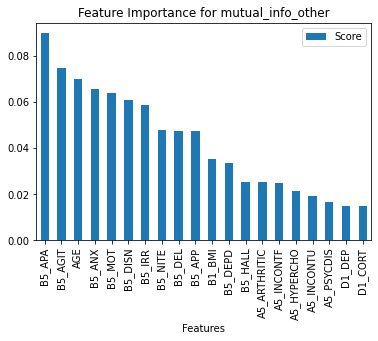

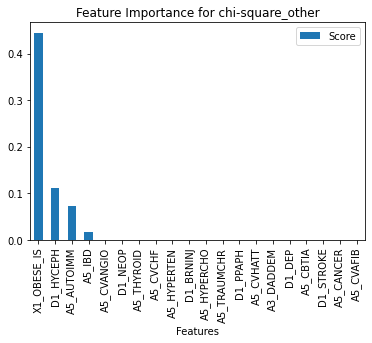

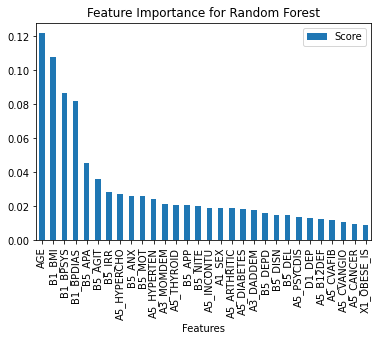

ValueError: ignored

In [16]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
main(non_genetic_df, dataset='other')

## Finetuning

### Finetuning for blood

In [ ]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)

# pre-process the raw data
df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag = get_data(non_genetic_df)
  
# getting combined features after performing feature selection
mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_features_blood)

# convert features to list
combined_features_list_blood = combined_featuresb['Features'].to_list()
# getting only top features after feature selection
final_features_df_blood = df_features_blood[combined_features_list_blood]
# merge the dataset for machine learning model
frames_blood = [final_features_df_blood, y_blood]
final_df_blood = pd.concat(frames_blood, axis=1)

# perform train_test_split
X_train, X_test, y_train, y_test = ml_prep(final_df_blood)

# list of classifier functions
classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42),       
                XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                ExtraTreesClassifier(n_estimators=500, max_depth=3),
                CatBoostClassifier(random_state=42)] 

# list of classifier names
model_name= ['Light Gradient Boosting Method', 
          'Random Forest', 
          'eXtreme Gradient Boosting', 
          'Gradient Boosting', 
          'Decision Tree', 
          'Logistic Regression', 
          'Extra Trees',
          'Categorical Boosting']

# evaluate performance and feature importance for each algorithm
model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Light Gradient Boosting Method: 
Accuracy Score: 77.88000000000001%

Macro-Averaged Precision score: 0.7736
Micro-Averaged Precision score: 0.7788
Macro-averaged Recall score: 0.7750
Micro-Averaged Recall score: 0.7788
Macro-Averaged F1 score: 0.7742
Micro-Averaged F1 score: 0.7788
F-Beta score: 0.7747
ROC_AUC Score: 0.7750
AUPRC is: 0.8638
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.75      0.74        48
           2       0.81      0.80      0.81        65

    accuracy                           0.78       113
   macro avg       0.77      0.78      0.77       113
weighted avg       0.78      0.78      0.78       113



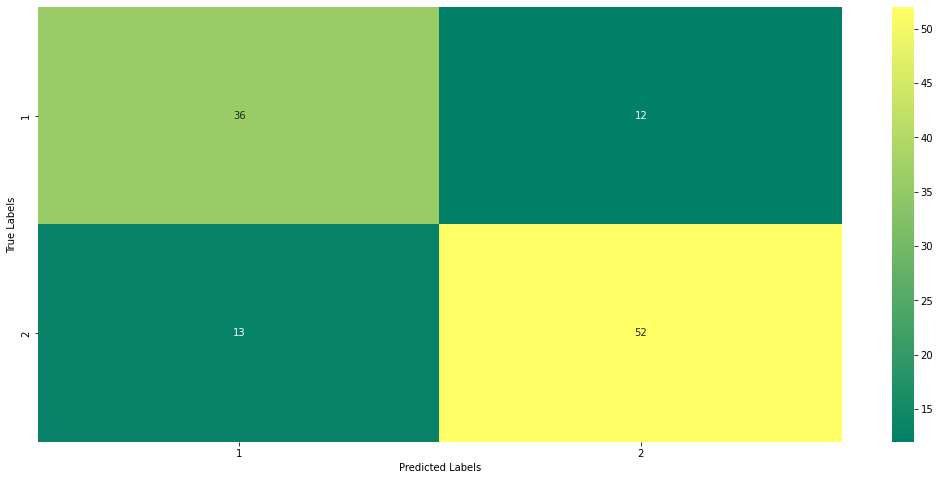

------------------------------------------------------------------------------------------------------------------------------------------------------


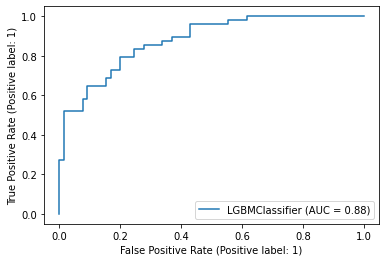


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 73.45%

Macro-Averaged Precision score: 0.7544
Micro-Averaged Precision score: 0.7345
Macro-averaged Recall score: 0.7529
Micro-Averaged Recall score: 0.7345
Macro-Averaged F1 score: 0.7345
Micro-Averaged F1 score: 0.7345
F-Beta score: 0.7409
ROC_AUC Score: 0.7529
AUPRC is: 0.8577
Classification Report: 
              precision    recall  f1-score   support

           1       0.64      0.88      0.74        48
           2       0.87      0.63      0.73        65

    accuracy                           0.73       113
   macro avg       0.75      0.75      0.73       113
weighted avg       0.77      0.73      0.73       113



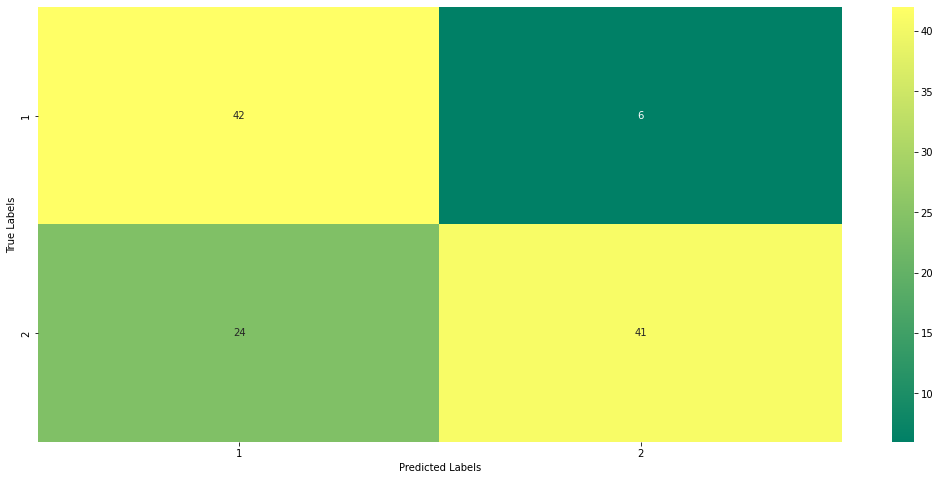

------------------------------------------------------------------------------------------------------------------------------------------------------


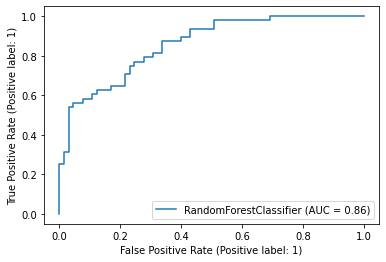


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 76.99000000000001%

Macro-Averaged Precision score: 0.7656
Micro-Averaged Precision score: 0.7699
Macro-averaged Recall score: 0.7700
Micro-Averaged Recall score: 0.7699
Macro-Averaged F1 score: 0.7668
Micro-Averaged F1 score: 0.7699
F-Beta score: 0.7685
ROC_AUC Score: 0.7700
AUPRC is: 0.8608
Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        48
           2       0.82      0.77      0.79        65

    accuracy                           0.77       113
   macro avg       0.77      0.77      0.77       113
weighted avg       0.77      0.77      0.77       113



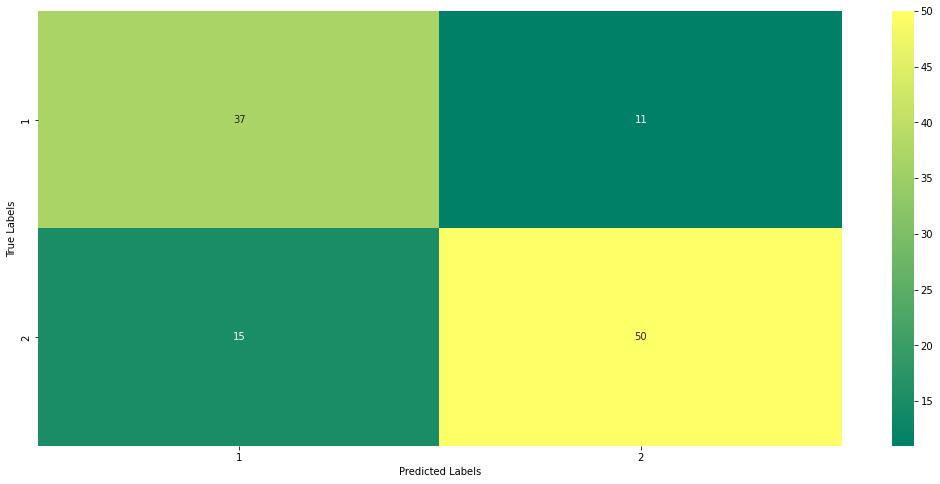

------------------------------------------------------------------------------------------------------------------------------------------------------


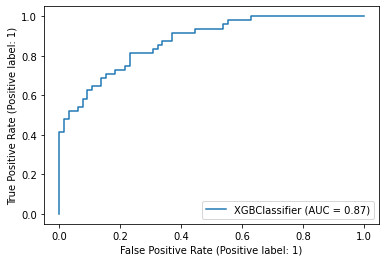


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 76.99000000000001%

Macro-Averaged Precision score: 0.7671
Micro-Averaged Precision score: 0.7699
Macro-averaged Recall score: 0.7728
Micro-Averaged Recall score: 0.7699
Macro-Averaged F1 score: 0.7677
Micro-Averaged F1 score: 0.7699
F-Beta score: 0.7702
ROC_AUC Score: 0.7728
AUPRC is: 0.8630
Classification Report: 
              precision    recall  f1-score   support

           1       0.70      0.79      0.75        48
           2       0.83      0.75      0.79        65

    accuracy                           0.77       113
   macro avg       0.77      0.77      0.77       113
weighted avg       0.78      0.77      0.77       113



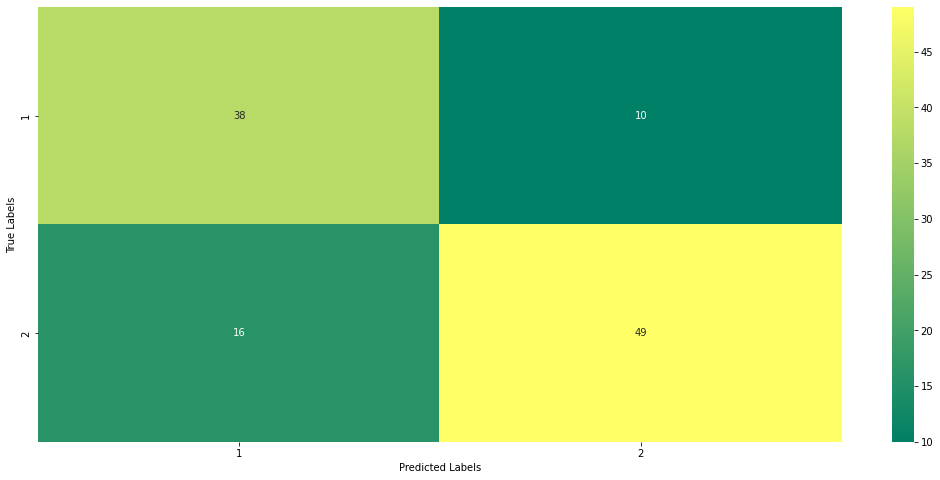

------------------------------------------------------------------------------------------------------------------------------------------------------


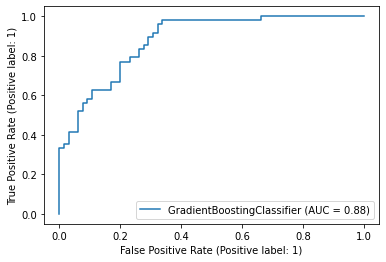


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 71.67999999999999%

Macro-Averaged Precision score: 0.7139
Micro-Averaged Precision score: 0.7168
Macro-averaged Recall score: 0.7184
Micro-Averaged Recall score: 0.7168
Macro-Averaged F1 score: 0.7141
Micro-Averaged F1 score: 0.7168
F-Beta score: 0.7162
ROC_AUC Score: 0.7184
AUPRC is: 0.8277
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.73      0.69        48
           2       0.78      0.71      0.74        65

    accuracy                           0.72       113
   macro avg       0.71      0.72      0.71       113
weighted avg       0.72      0.72      0.72       113



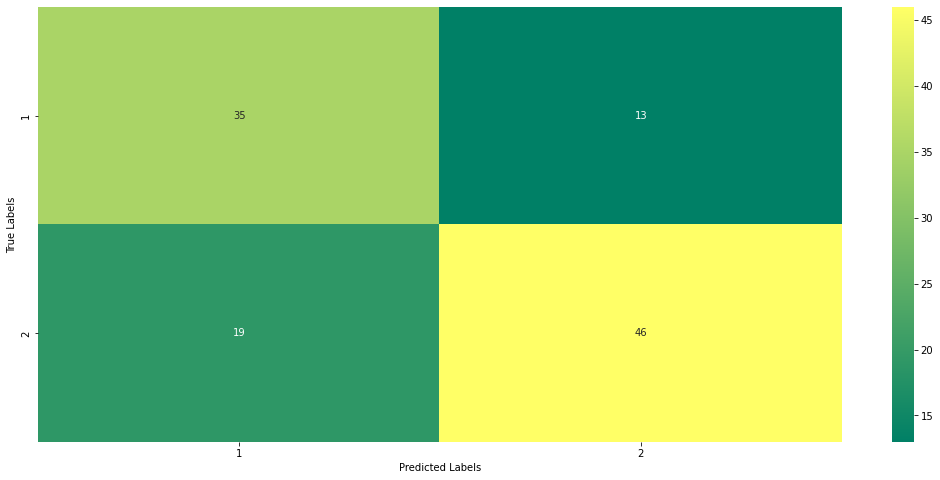

------------------------------------------------------------------------------------------------------------------------------------------------------


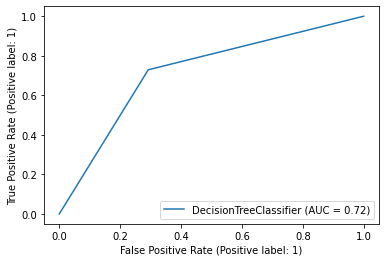


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 76.99000000000001%

Macro-Averaged Precision score: 0.7671
Micro-Averaged Precision score: 0.7699
Macro-averaged Recall score: 0.7728
Micro-Averaged Recall score: 0.7699
Macro-Averaged F1 score: 0.7677
Micro-Averaged F1 score: 0.7699
F-Beta score: 0.7702
ROC_AUC Score: 0.7728
AUPRC is: 0.8630
Classification Report: 
              precision    recall  f1-score   support

           1       0.70      0.79      0.75        48
           2       0.83      0.75      0.79        65

    accuracy                           0.77       113
   macro avg       0.77      0.77      0.77       113
weighted avg       0.78      0.77      0.77       113



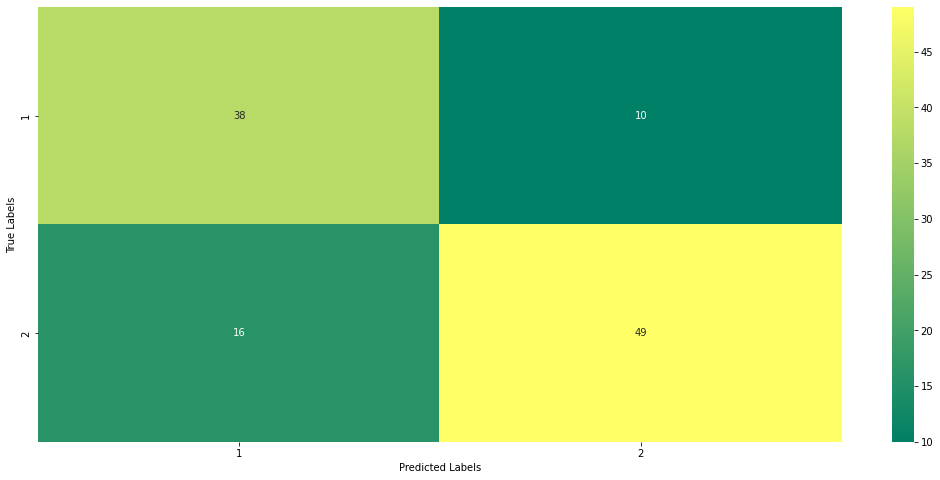

------------------------------------------------------------------------------------------------------------------------------------------------------


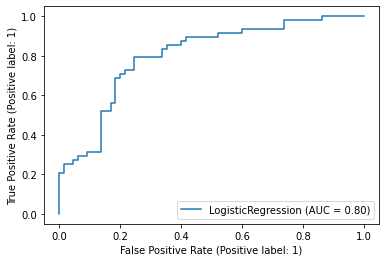


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 73.45%

Macro-Averaged Precision score: 0.7678
Micro-Averaged Precision score: 0.7345
Macro-averaged Recall score: 0.7583
Micro-Averaged Recall score: 0.7345
Macro-Averaged F1 score: 0.7340
Micro-Averaged F1 score: 0.7345
F-Beta score: 0.7416
ROC_AUC Score: 0.7583
AUPRC is: 0.8685
Classification Report: 
              precision    recall  f1-score   support

           1       0.63      0.92      0.75        48
           2       0.91      0.60      0.72        65

    accuracy                           0.73       113
   macro avg       0.77      0.76      0.73       113
weighted avg       0.79      0.73      0.73       113



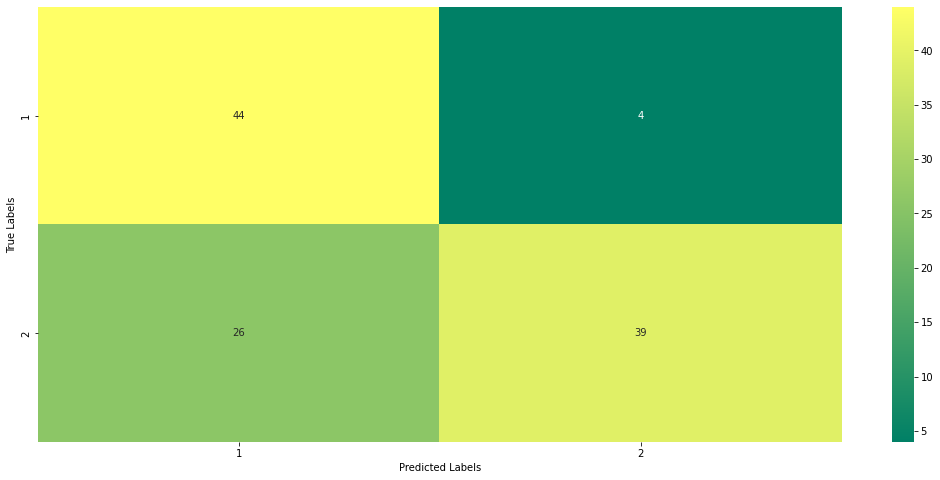

------------------------------------------------------------------------------------------------------------------------------------------------------


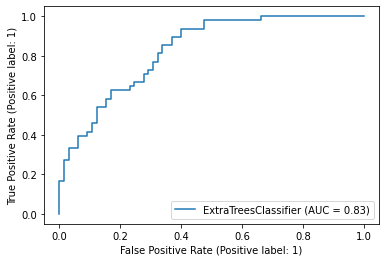


Learning rate set to 0.007326
0:	learn: 0.6897503	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6865691	total: 16.2ms	remaining: 8.09s
2:	learn: 0.6824968	total: 21ms	remaining: 6.98s
3:	learn: 0.6799104	total: 25.7ms	remaining: 6.39s
4:	learn: 0.6766721	total: 30.5ms	remaining: 6.07s
5:	learn: 0.6728062	total: 35.2ms	remaining: 5.83s
6:	learn: 0.6693322	total: 39.9ms	remaining: 5.65s
7:	learn: 0.6660686	total: 44.6ms	remaining: 5.53s
8:	learn: 0.6632375	total: 49.2ms	remaining: 5.42s
9:	learn: 0.6600014	total: 53.9ms	remaining: 5.33s
10:	learn: 0.6574563	total: 58.4ms	remaining: 5.25s
11:	learn: 0.6541565	total: 63.1ms	remaining: 5.2s
12:	learn: 0.6504672	total: 67.8ms	remaining: 5.14s
13:	learn: 0.6475092	total: 72.4ms	remaining: 5.1s
14:	learn: 0.6443462	total: 77.3ms	remaining: 5.07s
15:	learn: 0.6414765	total: 82ms	remaining: 5.04s
16:	learn: 0.6380892	total: 86.6ms	remaining: 5.01s
17:	learn: 0.6348286	total: 91.5ms	remaining: 4.99s
18:	learn: 0.6320340	total: 96.4ms	remaining: 4.9

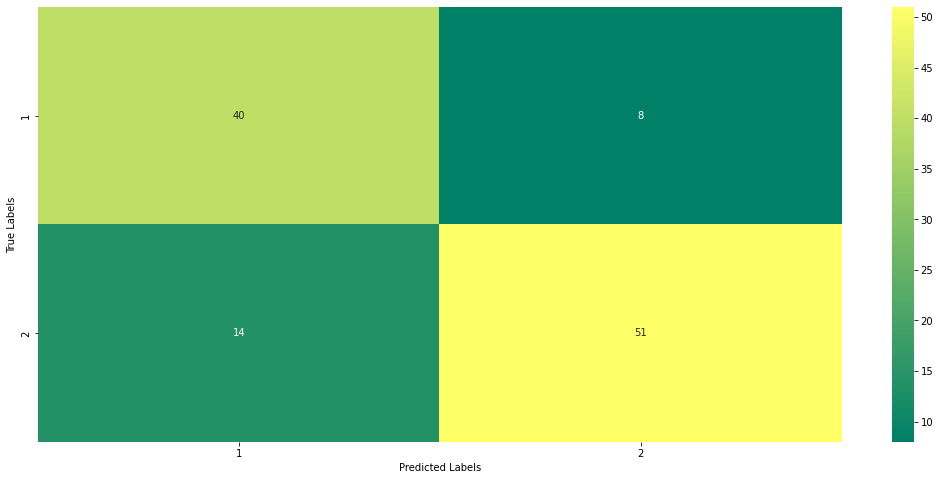

------------------------------------------------------------------------------------------------------------------------------------------------------


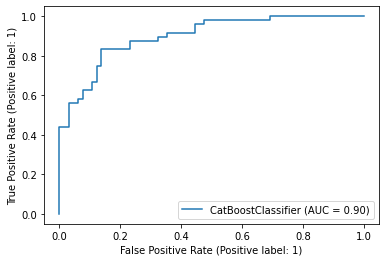

In [42]:
# lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42)
# GradientBoostingClassifier(n_estimators=300, max_depth=3)

# classifier_func = [lgbm.LGBMClassifier(),#colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42),
#                   RandomForestClassifier(),#n_estimators=450, max_depth=2, random_state=42),       
#                   XGBClassifier(),#colsample_bytree= 0.9429630322163536, gamma= 0.26156887351243674, max_depth= 5),                     
#                   GradientBoostingClassifier(),#n_estimators=300, max_depth=3), 
#                   DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6, max_features='log2', random_state=42),
#                   LogisticRegression(class_weight='balanced', max_iter=20, random_state=42, solver='sag'), #class_weight='balanced', max_iter=20, random_state=42, solver='sag'),
#                   ExtraTreesClassifier(), #n_estimators=450, max_depth=2),
#                   CatBoostClassifier(random_state=0)]#n_estimators=400, max_depth= 4, random_state=42)] 
# lgbm.LGBMClassifier(colsample_bytree=0.41343165360335155, learning_rate= 0.90265205865557, min_split_gain= 0.12405974733960266, 
#                 min_child_weight=44, num_leaves= 28, max_depth=80, reg_alpha=0.870992703347461,reg_lambda=0.899299246407077, subsample=0.9965555214987327)
classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42),
                RandomForestClassifier(n_estimators=75, max_depth=2),       
                XGBClassifier(colsample_bytree= 0.840545160958208, gamma= 0.3433699189306628, max_depth= 2),                     
                GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                DecisionTreeClassifier(),
                LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                ExtraTreesClassifier(n_estimators=500, max_depth=3),
                CatBoostClassifier(random_state=42)]  

# list of classifier names
model_name= ['Light Gradient Boosting Method', 
            'Random Forest', 
            'eXtreme Gradient Boosting', 
            'Gradient Boosting', 
            'Decision Tree', 
            'Logistic Regression', 
            'Extra Trees',
            'Categorical Boosting']
            
model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

In [ ]:
# list of classifier functions
classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42),
                  RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42),       
                  XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                  GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                  DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7, max_features='auto', random_state=42),
                  LogisticRegression(class_weight='balanced', max_iter=20, random_state=42, solver='sag'),
                  ExtraTreesClassifier(n_estimators=500, max_depth=5),
                  CatBoostClassifier(max_depth=5, n_estimators=800)] 

# list of classifier names
model_name= ['Light Gradient Boosting Method', 
            'Random Forest', 
            'eXtreme Gradient Boosting', 
            'Gradient Boosting', 
            'Decision Tree', 
            'Logistic Regression', 
            'Extra Trees',
            'Categorical Boosting']
            
model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

In [ ]:
# df = preprocessing(non_genetic_df)

# # getting top features after feature selection
# combined_features = combine_features()
# combined_features_list = combined_features['Features'].to_list()

# X = df[combined_features_list]
# y = df['P1_PT_TYPE']

# # merge the dataset for machine learning model
# frames = [X, y]
# final_df = pd.concat(frames, axis=1)

# X_train, X_test, y_train, y_test = ml_prep(final_df)


In [ ]:
import pickle
clf = CatBoostClassifier(random_state=42)
#Fitting model with training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluation(y_test, y_pred)
# pickle.dump(clf, open('CatBoost_model.pkl','wb'))


In [ ]:
CatBoost_model = pickle.load(open('/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/CatBoost_model.pkl','rb'))

In [ ]:
CatBoost_model

In [31]:
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)


In [32]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.736 params {'n_estimators': 300, 'max_depth': 3}
Gini 0.792 params {'n_estimators': 1000, 'max_depth': 8}
Gini 0.688 params {'n_estimators': 75, 'max_depth': 2}
Gini 0.781 params {'n_estimators': 625, 'max_depth': 7}
Gini 0.790 params {'n_estimators': 475, 'max_depth': 9}
Gini 0.788 params {'n_estimators': 575, 'max_depth': 7}
Gini 0.767 params {'n_estimators': 100, 'max_depth': 8}
Gini 0.770 params {'n_estimators': 675, 'max_depth': 5}
Gini 0.781 params {'n_estimators': 275, 'max_depth': 9}
Gini 0.781 params {'n_estimators': 750, 'max_depth': 9}
100%|██████████| 10/10 [00:50<00:00,  5.02s/it, best loss: 0.6878586110660203]
Hyperopt estimated optimum {'max_depth': 2.0, 'n_estimators': 75.0}


In [33]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))


Gini 0.762 params {'max_depth': 2, 'gamma': '0.343', 'colsample_bytree': '0.841'}
Gini 0.772 params {'max_depth': 3, 'gamma': '0.339', 'colsample_bytree': '0.845'}
Gini 0.772 params {'max_depth': 6, 'gamma': '0.051', 'colsample_bytree': '0.731'}
Gini 0.786 params {'max_depth': 5, 'gamma': '0.323', 'colsample_bytree': '0.344'}
Gini 0.770 params {'max_depth': 7, 'gamma': '0.024', 'colsample_bytree': '0.789'}
Gini 0.779 params {'max_depth': 8, 'gamma': '0.105', 'colsample_bytree': '0.468'}
Gini 0.764 params {'max_depth': 3, 'gamma': '0.051', 'colsample_bytree': '0.501'}
Gini 0.765 params {'max_depth': 3, 'gamma': '0.348', 'colsample_bytree': '0.947'}
Gini 0.786 params {'max_depth': 6, 'gamma': '0.031', 'colsample_bytree': '0.575'}
Gini 0.765 params {'max_depth': 2, 'gamma': '0.122', 'colsample_bytree': '0.469'}
100%|██████████| 10/10 [00:12<00:00,  1.25s/it, best loss: 0.761624777777995]
Hyperopt estimated optimum {'colsample_bytree': 0.840545160958208, 'gamma': 0.3433699189306628, 'max_d

In [34]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.775 params {'num_leaves': 80, 'colsample_bytree': '0.304'}
Gini 0.759 params {'num_leaves': 98, 'colsample_bytree': '0.593'}
Gini 0.775 params {'num_leaves': 122, 'colsample_bytree': '0.301'}
Gini 0.755 params {'num_leaves': 102, 'colsample_bytree': '0.724'}
Gini 0.755 params {'num_leaves': 106, 'colsample_bytree': '0.927'}
Gini 0.752 params {'num_leaves': 62, 'colsample_bytree': '0.933'}
Gini 0.755 params {'num_leaves': 14, 'colsample_bytree': '0.722'}
Gini 0.758 params {'num_leaves': 98, 'colsample_bytree': '0.618'}
Gini 0.759 params {'num_leaves': 60, 'colsample_bytree': '0.605'}
Gini 0.770 params {'num_leaves': 62, 'colsample_bytree': '0.431'}
100%|██████████| 10/10 [00:36<00:00,  3.64s/it, best loss: 0.7517395411421186]
Hyperopt estimated optimum {'colsample_bytree': 0.9328143556428994, 'num_leaves': 62.0}


In [38]:
from hyperopt import hp, fmin, tpe, Trials
lgb_class_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth', np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.3,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves', np.arange(8, 200, 2, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     5
}
def objective(params):
  lgbm_clf = lgbm.LGBMClassifier(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm_clf, X_train, y_train, cv=StratifiedKFold(),n_jobs=-1).mean() #scoring=gini_scorer
  print("Gini {:.3f} params {}".format(score, params))
  return score

trials = Trials()
best_result = fmin(
    fn=objective,                          
    space=lgb_class_params,   
    algo=tpe.suggest,              
    max_evals=50,                  
    trials=trials                   
)

print("Hyperopt estimated optimum {}".format(best_result))

Gini 0.611 params {'colsample_bytree': 0.9121264836220682, 'learning_rate': 0.2894790678119058, 'max_depth': 42, 'min_child_weight': 44, 'min_split_gain': 0.21047118765027562, 'n_estimators': 5, 'num_leaves': 70, 'reg_alpha': 0.7830524666382641, 'reg_lambda': 0.23752001262567546, 'subsample': 0.6496334008836834}
Gini 0.722 params {'colsample_bytree': 0.39583265120637695, 'learning_rate': 0.35038987335764593, 'max_depth': 62, 'min_child_weight': 29, 'min_split_gain': 0.7583593668662664, 'n_estimators': 5, 'num_leaves': 46, 'reg_alpha': 0.42557875399558487, 'reg_lambda': 0.5772034234435234, 'subsample': 0.7963434968210031}
Gini 0.756 params {'colsample_bytree': 0.8265091930484956, 'learning_rate': 0.36357856254369203, 'max_depth': 17, 'min_child_weight': 15, 'min_split_gain': 0.23972260526788602, 'n_estimators': 5, 'num_leaves': 60, 'reg_alpha': 0.20756645874517365, 'reg_lambda': 0.26325377363837443, 'subsample': 0.7528599193087844}
Gini 0.684 params {'colsample_bytree': 0.31689143047442

In [ ]:
# (colsample_bytree=0.9947521420250631, learning_rate= 0.7799587437319592, max_depth= 86, 
# min_child_weight= 48, min_split_gain= 0.9542186048868133, num_leaves=91, 
# reg_alpha= 0.7939150627161357, reg_lambda= 0.6828715692933739, subsample= 0.6378874482425733)

GridSearchCV

In [ ]:
# Random forest
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:

# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': list(range(100,2000,200)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': list(range(1,5,1)),
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

In [ ]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

In [ ]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

In [18]:
params = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=params, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='sag')


In [19]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, verbose=1, n_jobs=-1)
DT_grid.fit(X_train, y_train)
print(DT_grid.best_estimator_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='log2', random_state=42)


In [20]:
# catboost
params = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

#Instantiate GridSearchCV
cat_grid = GridSearchCV (estimator = CatBoostClassifier(random_state=42), param_grid = params, scoring ='accuracy', cv = 5)

#fit the model
cat_grid.fit(X_train, y_train)

#returns the estimator with the best performance
print(cat_grid.best_estimator_)

#returns the best score
print(cat_grid.best_score_)

#returns the best parameters
print(cat_grid.best_params_)

Streaming output truncated to the last 5000 lines.
808:	learn: 0.1745290	total: 2.79s	remaining: 658ms
809:	learn: 0.1743044	total: 2.79s	remaining: 655ms
810:	learn: 0.1740231	total: 2.79s	remaining: 651ms
811:	learn: 0.1737594	total: 2.8s	remaining: 648ms
812:	learn: 0.1735361	total: 2.8s	remaining: 644ms
813:	learn: 0.1733567	total: 2.81s	remaining: 641ms
814:	learn: 0.1731898	total: 2.81s	remaining: 639ms
815:	learn: 0.1729606	total: 2.82s	remaining: 636ms
816:	learn: 0.1728293	total: 2.82s	remaining: 632ms
817:	learn: 0.1726717	total: 2.83s	remaining: 629ms
818:	learn: 0.1724162	total: 2.83s	remaining: 625ms
819:	learn: 0.1721059	total: 2.83s	remaining: 622ms
820:	learn: 0.1719527	total: 2.83s	remaining: 618ms
821:	learn: 0.1716467	total: 2.84s	remaining: 615ms
822:	learn: 0.1714390	total: 2.84s	remaining: 611ms
823:	learn: 0.1711526	total: 2.84s	remaining: 608ms
824:	learn: 0.1708789	total: 2.85s	remaining: 604ms
825:	learn: 0.1706079	total: 2.85s	remaining: 600ms
826:	learn: 0.1

In [ ]:
# optimal models
# lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136, num_leaves= 122), 
#RandomForestClassifier(criterion= 'gini', max_depth=6, max_features='auto', n_estimators= 500), 
# XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8)

### Finetuning for other

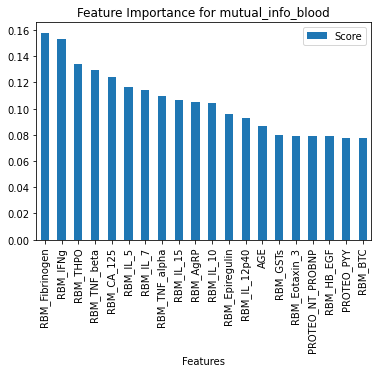

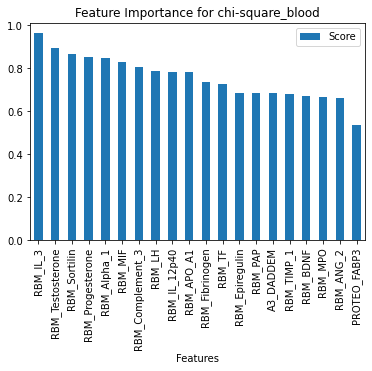

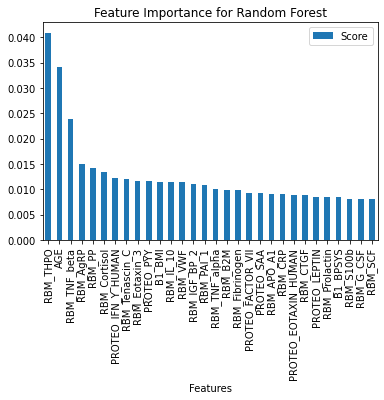

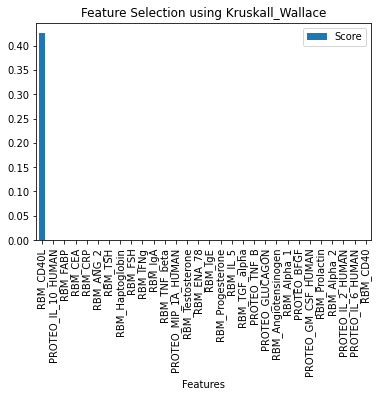

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	19
Rejected: 	150
Iteration: 	9 / 10
Confirmed: 	12
Tentative: 	7
Rejected: 	150


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	12
Tentative: 	2
Rejected: 	150

------Support and Ranking for each feature------
AGE  - Ranking:  1
PROTEO_CRP  - Ranking:  1
RBM_AgRP  - Ranking:  1
RBM_CRP  - Ranking:  1
RBM_Eotaxin_3  - Ranking:  1
RBM_IL_10  - Ranking:  1
RBM_PP  - Ranking:  1
RBM_S100b  - Ranking:  1
RBM_Tenascin_C  - Ranking:  1
RBM_THPO  - Ranking:  1
RBM_TNF_alpha  - Ranking:  1
RBM_TNF_beta  - Rank

In [ ]:
# pre-process the raw data
df_blood, df_diagnosis, X_blood, y_blood, X_diag, y_diag = get_data(non_genetic_df)

  
# getting combined features after performing feature selection
mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, kruskal_dfb, kw_plotb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_blood)

# convert features to list
combined_features_list_blood = combined_featuresb['Features'].to_list()
# getting only top features after feature selection
final_features_df_blood = df_blood[combined_features_list_blood]
# merge the dataset for machine learning model
frames_blood = [final_features_df_blood, y_blood]
final_df_blood = pd.concat(frames_blood, axis=1)

# perform train_test_split
X_train, X_test, y_train, y_test = ml_prep(final_df_blood)

# evaluate performance and feature importance for each algorithm
# model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Light Gradient Boosting Method: 
Accuracy Score: 82.3%

Macro-Averaged Precision score: 0.8201
Micro-Averaged Precision score: 0.8230
Macro-averaged Recall score: 0.8162
Micro-Averaged Recall score: 0.8230
Macro-Averaged F1 score: 0.8179
Micro-Averaged F1 score: 0.8230
F-Beta score: 0.8168
ROC_AUC Score: 0.8162
AUPRC is: 0.8885
Classification Report: 
              precision    recall  f1-score   support

           1       0.80      0.77      0.79        48
           2       0.84      0.86      0.85        65

    accuracy                           0.82       113
   macro avg       0.82      0.82      0.82       113
weighted avg       0.82      0.82      0.82       113



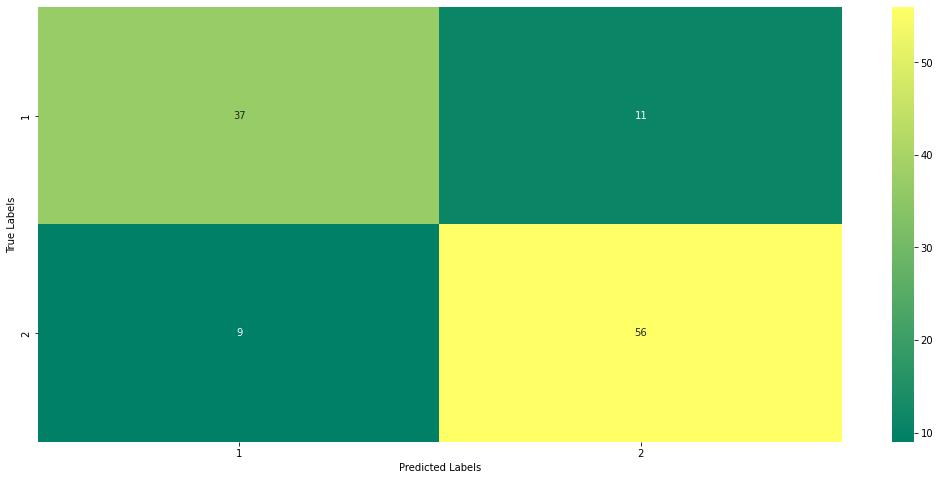

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 74.33999999999999%

Macro-Averaged Precision score: 0.7606
Micro-Averaged Precision score: 0.7434
Macro-averaged Recall score: 0.7606
Micro-Averaged Recall score: 0.7434
Macro-Averaged F1 score: 0.7434
Micro-Averaged F1 score: 0.7434
F-Beta score: 0.7495
ROC_AUC Score: 0.7606
AUPRC is: 0.8623
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.88      0.74        48
           2       0.88      0.65      0.74        65

    accuracy                           0.74       113
   macro avg       0.76      0.76      0.74       113
weighted avg       0.78      0.74      0.74       113



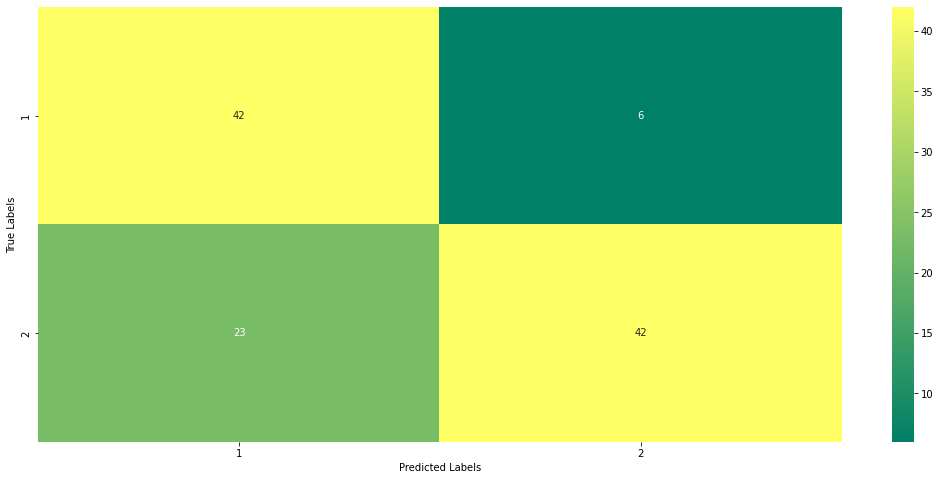

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 79.65%

Macro-Averaged Precision score: 0.7947
Micro-Averaged Precision score: 0.7965
Macro-averaged Recall score: 0.8013
Micro-Averaged Recall score: 0.7965
Macro-Averaged F1 score: 0.7949
Micro-Averaged F1 score: 0.7965
F-Beta score: 0.7979
ROC_AUC Score: 0.8013
AUPRC is: 0.8820
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.83      0.78        48
           2       0.86      0.77      0.81        65

    accuracy                           0.80       113
   macro avg       0.79      0.80      0.79       113
weighted avg       0.80      0.80      0.80       113



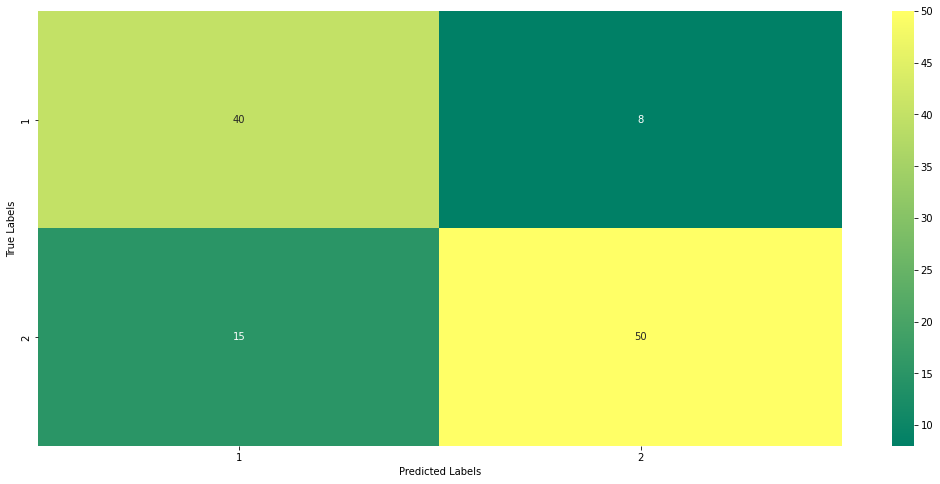

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 80.53%

Macro-Averaged Precision score: 0.8008
Micro-Averaged Precision score: 0.8053
Macro-averaged Recall score: 0.8008
Micro-Averaged Recall score: 0.8053
Macro-Averaged F1 score: 0.8008
Micro-Averaged F1 score: 0.8053
F-Beta score: 0.8008
ROC_AUC Score: 0.8008
AUPRC is: 0.8794
Classification Report: 
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        48
           2       0.83      0.83      0.83        65

    accuracy                           0.81       113
   macro avg       0.80      0.80      0.80       113
weighted avg       0.81      0.81      0.81       113



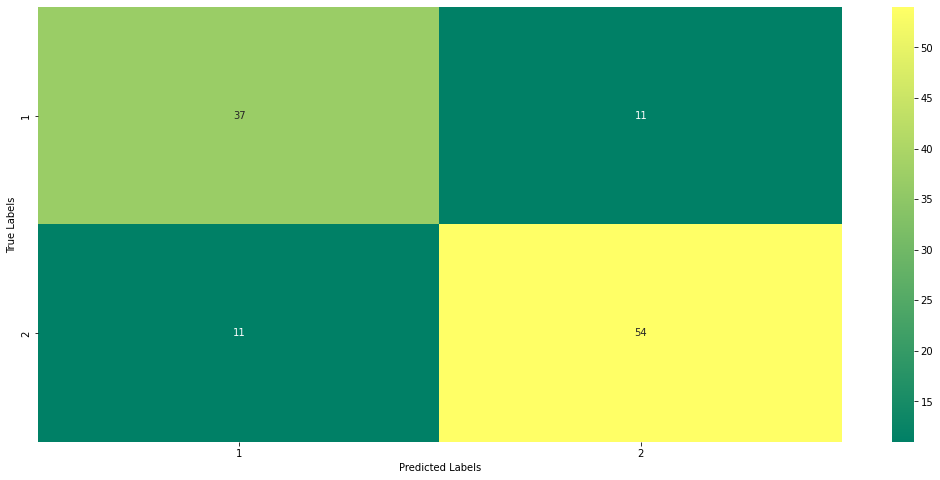

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 69.91000000000001%

Macro-Averaged Precision score: 0.6918
Micro-Averaged Precision score: 0.6991
Macro-averaged Recall score: 0.6894
Micro-Averaged Recall score: 0.6991
Macro-Averaged F1 score: 0.6904
Micro-Averaged F1 score: 0.6991
F-Beta score: 0.6897
ROC_AUC Score: 0.6894
AUPRC is: 0.8134
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.62      0.64        48
           2       0.73      0.75      0.74        65

    accuracy                           0.70       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.70      0.70      0.70       113



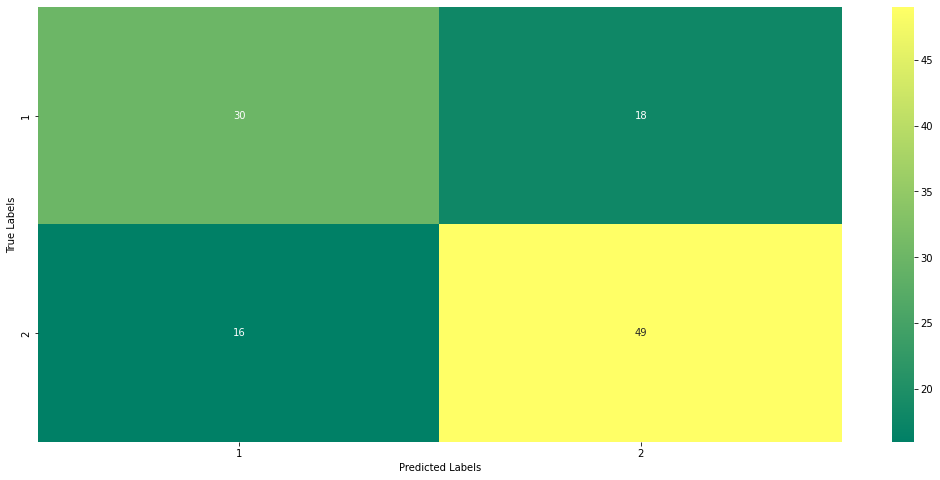

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 76.11%

Macro-Averaged Precision score: 0.7592
Micro-Averaged Precision score: 0.7611
Macro-averaged Recall score: 0.7651
Micro-Averaged Recall score: 0.7611
Macro-Averaged F1 score: 0.7592
Micro-Averaged F1 score: 0.7611
F-Beta score: 0.7620
ROC_AUC Score: 0.7651
AUPRC is: 0.8582
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.79      0.74        48
           2       0.83      0.74      0.78        65

    accuracy                           0.76       113
   macro avg       0.76      0.77      0.76       113
weighted avg       0.77      0.76      0.76       113



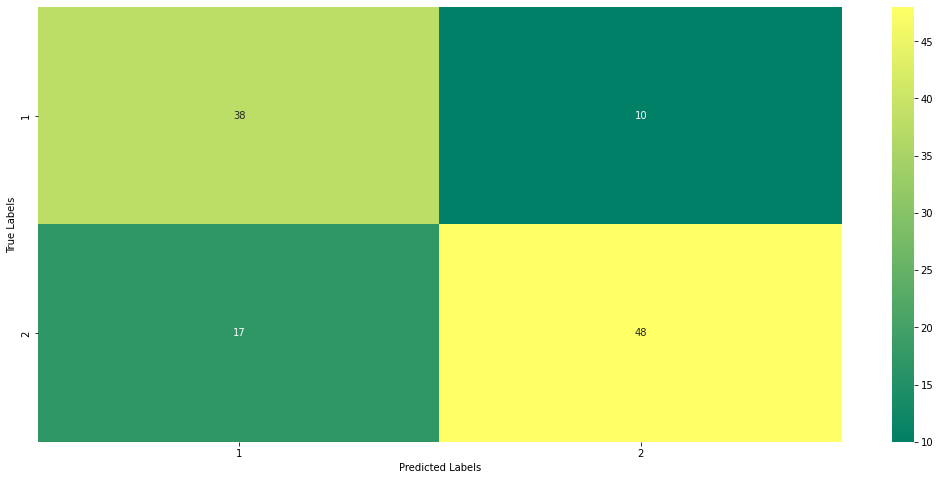

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 71.67999999999999%

Macro-Averaged Precision score: 0.7656
Micro-Averaged Precision score: 0.7168
Macro-averaged Recall score: 0.7457
Micro-Averaged Recall score: 0.7168
Macro-Averaged F1 score: 0.7150
Micro-Averaged F1 score: 0.7168
F-Beta score: 0.7239
ROC_AUC Score: 0.7457
AUPRC is: 0.8668
Classification Report: 
              precision    recall  f1-score   support

           1       0.61      0.94      0.74        48
           2       0.92      0.55      0.69        65

    accuracy                           0.72       113
   macro avg       0.77      0.75      0.72       113
weighted avg       0.79      0.72      0.71       113



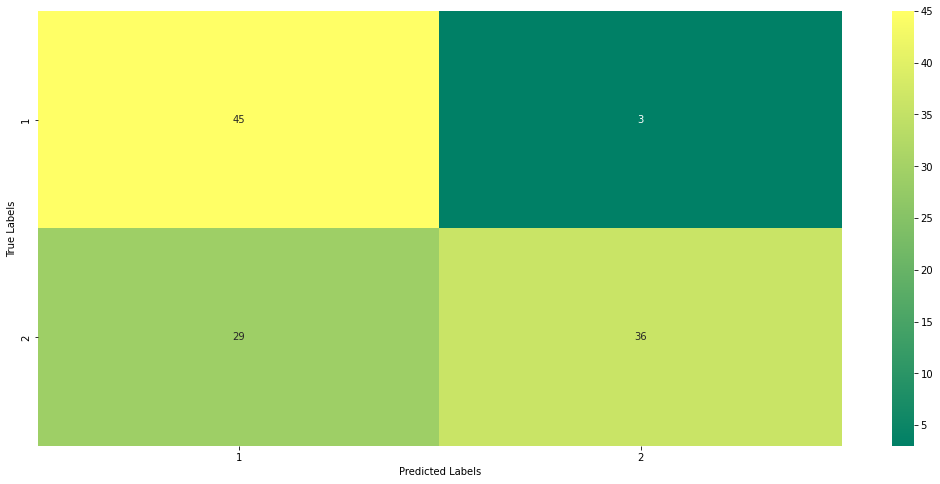

------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.016973
0:	learn: 0.6891256	total: 2.4ms	remaining: 956ms
1:	learn: 0.6838735	total: 4.82ms	remaining: 959ms
2:	learn: 0.6789431	total: 7.2ms	remaining: 952ms
3:	learn: 0.6725699	total: 9.49ms	remaining: 939ms
4:	learn: 0.6658897	total: 11.6ms	remaining: 920ms
5:	learn: 0.6604334	total: 13.9ms	remaining: 910ms
6:	learn: 0.6547783	total: 16.1ms	remaining: 902ms
7:	learn: 0.6498261	total: 18.3ms	remaining: 895ms
8:	learn: 0.6461844	total: 20.7ms	remaining: 898ms
9:	learn: 0.6411338	total: 23.1ms	remaining: 899ms
10:	learn: 0.6365613	total: 25.3ms	remaining: 895ms
11:	learn: 0.6313704	total: 27.5ms	remaining: 890ms
12:	learn: 0.6269655	total: 29.9ms	remaining: 889ms
13:	learn: 0.6203811	total: 32.2ms	remaining: 888ms
14:	learn: 0.6167822	total: 34.4ms	remaining: 883ms
15:	learn: 0.6136566	total: 36.7ms	remaining: 880m

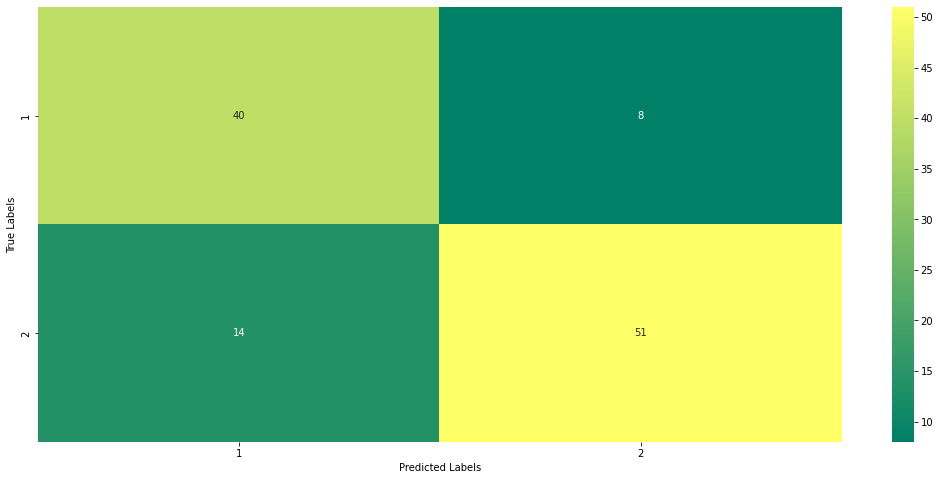

------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
# lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42)
# GradientBoostingClassifier(n_estimators=300, max_depth=3)

classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42),
                  RandomForestClassifier(n_estimators=450, max_depth=2, random_state=42),       
                  XGBClassifier(colsample_bytree= 0.9429630322163536, gamma= 0.26156887351243674, max_depth= 5),                     
                  GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                  DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7, max_features='auto', random_state=42),
                  LogisticRegression(class_weight='balanced', max_iter=20, random_state=42, solver='sag'),
                  ExtraTreesClassifier(n_estimators=450, max_depth=2),
                  CatBoostClassifier(n_estimators=400, max_depth= 4, random_state=42)] 

# list of classifier names
model_name= ['Light Gradient Boosting Method', 
            'Random Forest', 
            'eXtreme Gradient Boosting', 
            'Gradient Boosting', 
            'Decision Tree', 
            'Logistic Regression', 
            'Extra Trees',
            'Categorical Boosting']
            
model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Light Gradient Boosting Method: 
Accuracy Score: 82.3%

Macro-Averaged Precision score: 0.8201
Micro-Averaged Precision score: 0.8230
Macro-averaged Recall score: 0.8162
Micro-Averaged Recall score: 0.8230
Macro-Averaged F1 score: 0.8179
Micro-Averaged F1 score: 0.8230
F-Beta score: 0.8168
ROC_AUC Score: 0.8162
AUPRC is: 0.8885
Classification Report: 
              precision    recall  f1-score   support

           1       0.80      0.77      0.79        48
           2       0.84      0.86      0.85        65

    accuracy                           0.82       113
   macro avg       0.82      0.82      0.82       113
weighted avg       0.82      0.82      0.82       113



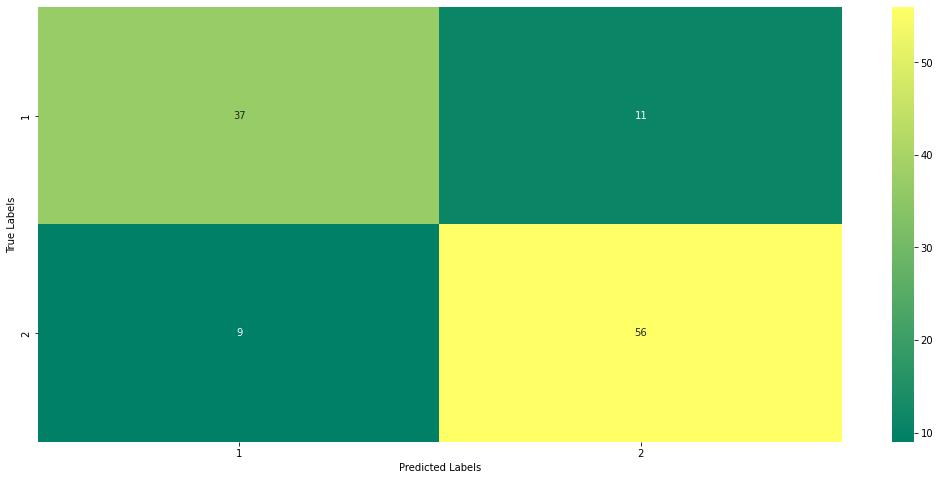

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 79.65%

Macro-Averaged Precision score: 0.7947
Micro-Averaged Precision score: 0.7965
Macro-averaged Recall score: 0.8013
Micro-Averaged Recall score: 0.7965
Macro-Averaged F1 score: 0.7949
Micro-Averaged F1 score: 0.7965
F-Beta score: 0.7979
ROC_AUC Score: 0.8013
AUPRC is: 0.8820
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.83      0.78        48
           2       0.86      0.77      0.81        65

    accuracy                           0.80       113
   macro avg       0.79      0.80      0.79       113
weighted avg       0.80      0.80      0.80       113



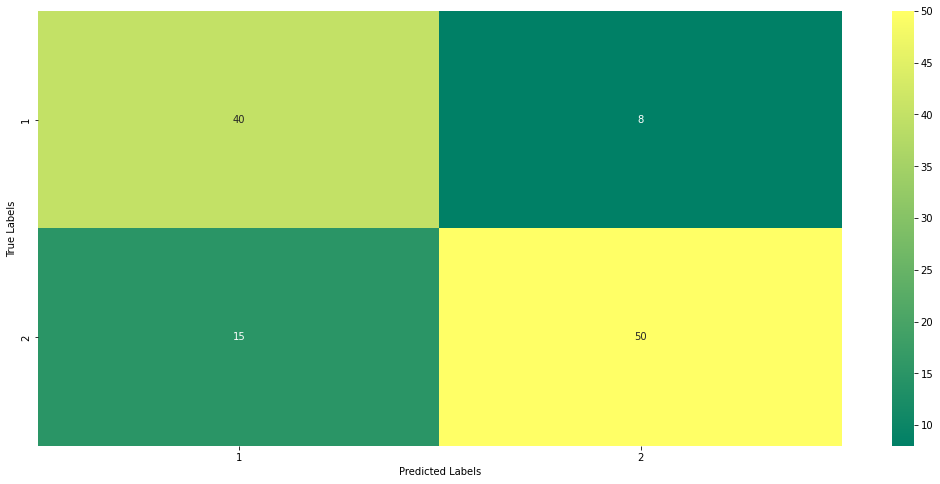

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 81.42%

Macro-Averaged Precision score: 0.8098
Micro-Averaged Precision score: 0.8142
Macro-averaged Recall score: 0.8139
Micro-Averaged Recall score: 0.8142
Macro-Averaged F1 score: 0.8113
Micro-Averaged F1 score: 0.8142
F-Beta score: 0.8127
ROC_AUC Score: 0.8139
AUPRC is: 0.8882
Classification Report: 
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        48
           2       0.85      0.82      0.83        65

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.82      0.81      0.81       113



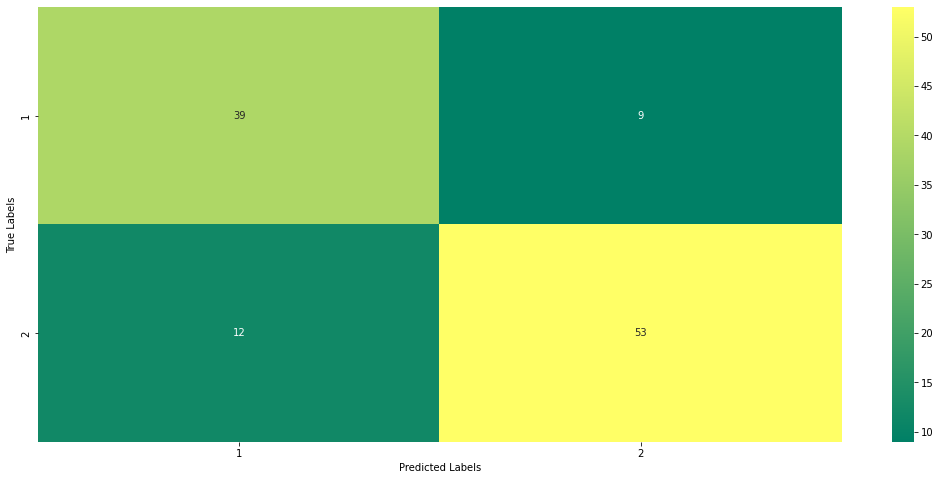

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 81.42%

Macro-Averaged Precision score: 0.8096
Micro-Averaged Precision score: 0.8142
Macro-averaged Recall score: 0.8112
Micro-Averaged Recall score: 0.8142
Macro-Averaged F1 score: 0.8104
Micro-Averaged F1 score: 0.8142
F-Beta score: 0.8109
ROC_AUC Score: 0.8112
AUPRC is: 0.8859
Classification Report: 
              precision    recall  f1-score   support

           1       0.78      0.79      0.78        48
           2       0.84      0.83      0.84        65

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.81      0.81      0.81       113



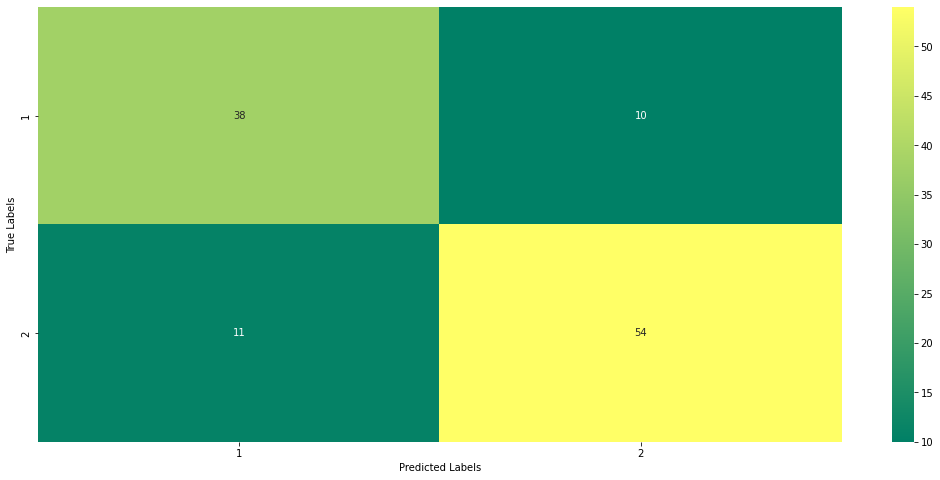

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 69.91000000000001%

Macro-Averaged Precision score: 0.6918
Micro-Averaged Precision score: 0.6991
Macro-averaged Recall score: 0.6894
Micro-Averaged Recall score: 0.6991
Macro-Averaged F1 score: 0.6904
Micro-Averaged F1 score: 0.6991
F-Beta score: 0.6897
ROC_AUC Score: 0.6894
AUPRC is: 0.8134
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.62      0.64        48
           2       0.73      0.75      0.74        65

    accuracy                           0.70       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.70      0.70      0.70       113



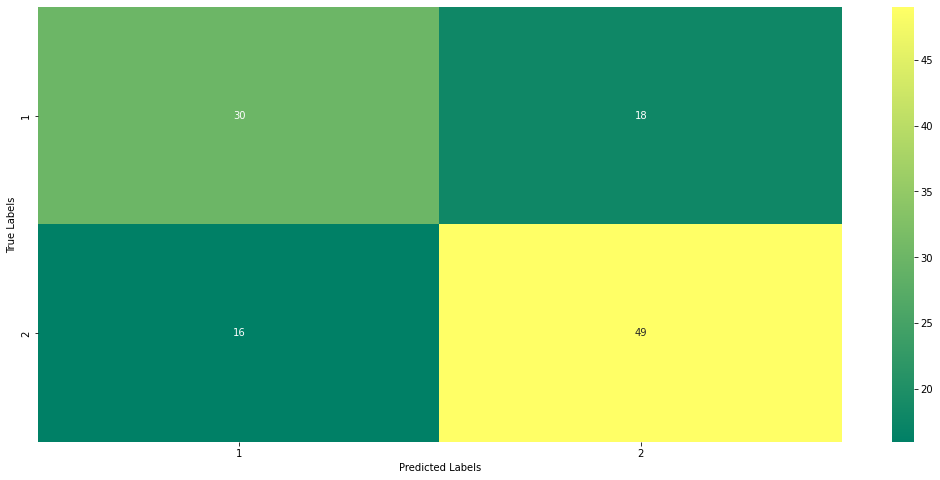

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 76.11%

Macro-Averaged Precision score: 0.7592
Micro-Averaged Precision score: 0.7611
Macro-averaged Recall score: 0.7651
Micro-Averaged Recall score: 0.7611
Macro-Averaged F1 score: 0.7592
Micro-Averaged F1 score: 0.7611
F-Beta score: 0.7620
ROC_AUC Score: 0.7651
AUPRC is: 0.8582
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.79      0.74        48
           2       0.83      0.74      0.78        65

    accuracy                           0.76       113
   macro avg       0.76      0.77      0.76       113
weighted avg       0.77      0.76      0.76       113



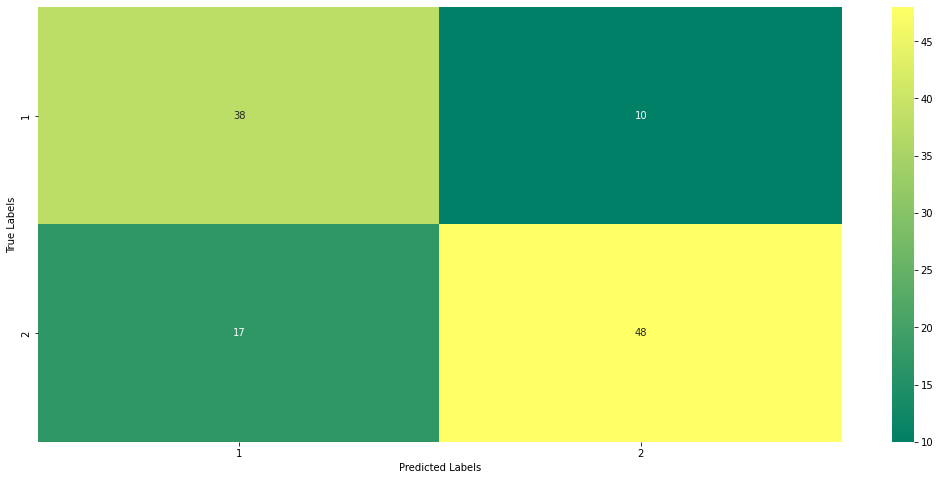

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 77.88000000000001%

Macro-Averaged Precision score: 0.7968
Micro-Averaged Precision score: 0.7788
Macro-averaged Recall score: 0.7968
Micro-Averaged Recall score: 0.7788
Macro-Averaged F1 score: 0.7788
Micro-Averaged F1 score: 0.7788
F-Beta score: 0.7852
ROC_AUC Score: 0.7968
AUPRC is: 0.8897
Classification Report: 
              precision    recall  f1-score   support

           1       0.68      0.92      0.78        48
           2       0.92      0.68      0.78        65

    accuracy                           0.78       113
   macro avg       0.80      0.80      0.78       113
weighted avg       0.81      0.78      0.78       113



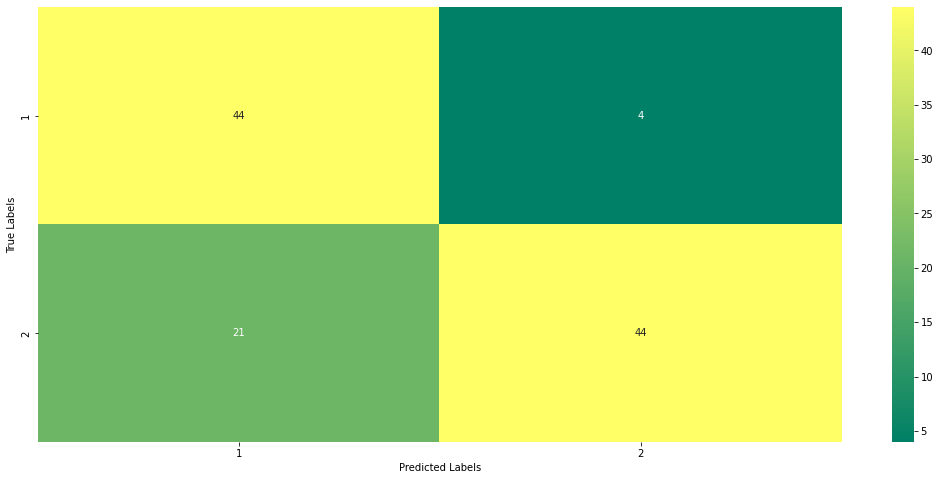

------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.007326
0:	learn: 0.6914021	total: 2.31ms	remaining: 2.31s
1:	learn: 0.6891147	total: 4.92ms	remaining: 2.46s
2:	learn: 0.6862902	total: 7.29ms	remaining: 2.42s
3:	learn: 0.6834512	total: 9.63ms	remaining: 2.4s
4:	learn: 0.6804312	total: 12ms	remaining: 2.38s
5:	learn: 0.6779320	total: 14.3ms	remaining: 2.37s
6:	learn: 0.6753221	total: 16.7ms	remaining: 2.36s
7:	learn: 0.6735340	total: 19ms	remaining: 2.35s
8:	learn: 0.6707673	total: 21.5ms	remaining: 2.37s
9:	learn: 0.6683127	total: 23.9ms	remaining: 2.36s
10:	learn: 0.6661583	total: 26.2ms	remaining: 2.35s
11:	learn: 0.6635777	total: 28.5ms	remaining: 2.34s
12:	learn: 0.6613894	total: 30.8ms	remaining: 2.34s
13:	learn: 0.6590473	total: 36.3ms	remaining: 2.55s
14:	learn: 0.6570042	total: 39.7ms	remaining: 2.61s
15:	learn: 0.6550622	total: 45.1ms	remaining: 2.77s
1

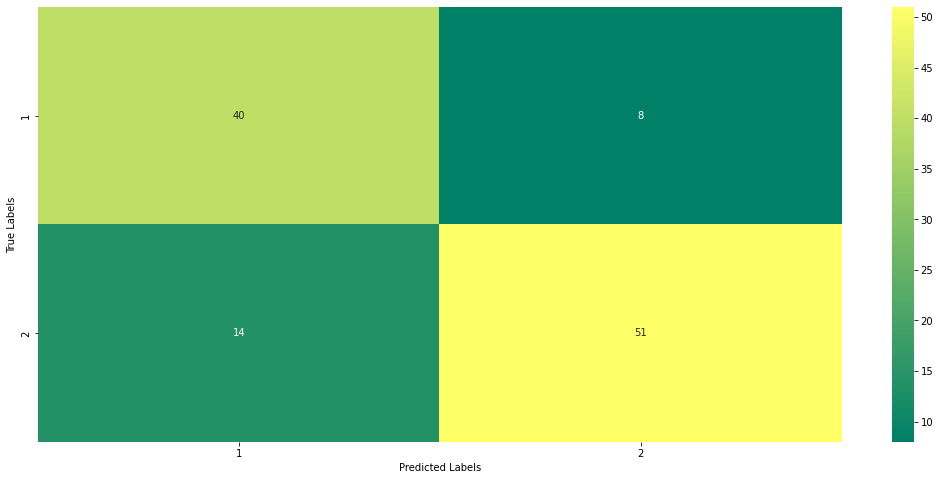

------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
# list of classifier functions
classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.8668118462588221,num_leaves= 32, random_state=42),
                  RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42),       
                  XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                  GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                  DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7, max_features='auto', random_state=42),
                  LogisticRegression(class_weight='balanced', max_iter=20, random_state=42, solver='sag'),
                  ExtraTreesClassifier(n_estimators=500, max_depth=5),
                  CatBoostClassifier(max_depth=4, random_state=42)] 

# list of classifier names
model_name= ['Light Gradient Boosting Method', 
            'Random Forest', 
            'eXtreme Gradient Boosting', 
            'Gradient Boosting', 
            'Decision Tree', 
            'Logistic Regression', 
            'Extra Trees',
            'Categorical Boosting']
            
model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name)

In [ ]:
# df = preprocessing(non_genetic_df)

# # getting top features after feature selection
# combined_features = combine_features()
# combined_features_list = combined_features['Features'].to_list()

# X = df[combined_features_list]
# y = df['P1_PT_TYPE']

# # merge the dataset for machine learning model
# frames = [X, y]
# final_df = pd.concat(frames, axis=1)

# X_train, X_test, y_train, y_test = ml_prep(final_df)


In [ ]:
import pickle
clf = CatBoostClassifier(random_state=42)
#Fitting model with training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluation(y_test, y_pred)
# pickle.dump(clf, open('CatBoost_model.pkl','wb'))


In [ ]:
CatBoost_model = pickle.load(open('/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/CatBoost_model.pkl','rb'))

In [ ]:
CatBoost_model

In [ ]:
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)


In [ ]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.753 params {'n_estimators': 625, 'max_depth': 4}
Gini 0.766 params {'n_estimators': 475, 'max_depth': 5}
Gini 0.772 params {'n_estimators': 525, 'max_depth': 8}
Gini 0.773 params {'n_estimators': 400, 'max_depth': 9}
Gini 0.772 params {'n_estimators': 400, 'max_depth': 8}
Gini 0.780 params {'n_estimators': 750, 'max_depth': 10}
Gini 0.768 params {'n_estimators': 625, 'max_depth': 5}
Gini 0.736 params {'n_estimators': 125, 'max_depth': 3}
Gini 0.715 params {'n_estimators': 450, 'max_depth': 2}
Gini 0.773 params {'n_estimators': 325, 'max_depth': 5}
100%|██████████| 10/10 [00:48<00:00,  4.88s/it, best loss: 0.7151333918754268]
Hyperopt estimated optimum {'max_depth': 2.0, 'n_estimators': 450.0}


In [ ]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))


Gini 0.760 params {'max_depth': 2, 'gamma': '0.430', 'colsample_bytree': '0.891'}
Gini 0.774 params {'max_depth': 4, 'gamma': '0.073', 'colsample_bytree': '0.476'}
Gini 0.774 params {'max_depth': 6, 'gamma': '0.479', 'colsample_bytree': '0.496'}
Gini 0.753 params {'max_depth': 5, 'gamma': '0.262', 'colsample_bytree': '0.943'}
Gini 0.781 params {'max_depth': 6, 'gamma': '0.063', 'colsample_bytree': '0.326'}
Gini 0.770 params {'max_depth': 4, 'gamma': '0.237', 'colsample_bytree': '0.437'}
Gini 0.774 params {'max_depth': 4, 'gamma': '0.165', 'colsample_bytree': '0.446'}
Gini 0.755 params {'max_depth': 6, 'gamma': '0.359', 'colsample_bytree': '0.963'}
Gini 0.761 params {'max_depth': 3, 'gamma': '0.209', 'colsample_bytree': '0.758'}
Gini 0.769 params {'max_depth': 3, 'gamma': '0.261', 'colsample_bytree': '0.638'}
100%|██████████| 10/10 [00:15<00:00,  1.52s/it, best loss: 0.7527320838703497]
Hyperopt estimated optimum {'colsample_bytree': 0.9429630322163536, 'gamma': 0.26156887351243674, 'ma

In [ ]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.758 params {'num_leaves': 66, 'colsample_bytree': '0.540'}
Gini 0.770 params {'num_leaves': 26, 'colsample_bytree': '0.322'}
Gini 0.745 params {'num_leaves': 32, 'colsample_bytree': '0.867'}
Gini 0.758 params {'num_leaves': 108, 'colsample_bytree': '0.466'}
Gini 0.758 params {'num_leaves': 124, 'colsample_bytree': '0.539'}
Gini 0.769 params {'num_leaves': 112, 'colsample_bytree': '0.385'}
Gini 0.778 params {'num_leaves': 66, 'colsample_bytree': '0.311'}
Gini 0.769 params {'num_leaves': 94, 'colsample_bytree': '0.390'}
Gini 0.770 params {'num_leaves': 68, 'colsample_bytree': '0.343'}
Gini 0.769 params {'num_leaves': 50, 'colsample_bytree': '0.360'}
100%|██████████| 10/10 [00:49<00:00,  4.93s/it, best loss: 0.7446252099985723]
Hyperopt estimated optimum {'colsample_bytree': 0.8668118462588221, 'num_leaves': 32.0}


In [ ]:
from hyperopt import hp, fmin, tpe, Trials
lgb_class_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth', np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.3,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves', np.arange(8, 200, 2, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     5
}
def objective(params):
  lgbm_clf = lgbm.LGBMClassifier(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm_clf, X_train, y_train, cv=StratifiedKFold(),n_jobs=-1).mean() #scoring=gini_scorer
  print("Gini {:.3f} params {}".format(score, params))
  return score

trials = Trials()
best_result = fmin(
    fn=objective,                          
    space=lgb_class_params,   
    algo=tpe.suggest,              
    max_evals=50,                  
    trials=trials                   
)

print("Hyperopt estimated optimum {}".format(best_result))

Gini 0.518 params {'colsample_bytree': 0.726094046949464, 'learning_rate': 0.8016511746399949, 'max_depth': 53, 'min_child_weight': 48, 'min_split_gain': 0.2772637515982317, 'n_estimators': 5, 'num_leaves': 58, 'reg_alpha': 0.24295685701064562, 'reg_lambda': 0.9945487091956374, 'subsample': 0.9017755505897093}
Gini 0.711 params {'colsample_bytree': 0.934836449254242, 'learning_rate': 0.5722540023949753, 'max_depth': 46, 'min_child_weight': 36, 'min_split_gain': 0.9756611253351287, 'n_estimators': 5, 'num_leaves': 76, 'reg_alpha': 0.8285531040627977, 'reg_lambda': 0.42571553424019026, 'subsample': 0.8800459051963585}
Gini 0.673 params {'colsample_bytree': 0.5609422620941357, 'learning_rate': 0.42660056128934576, 'max_depth': 22, 'min_child_weight': 41, 'min_split_gain': 0.416650218737054, 'n_estimators': 5, 'num_leaves': 100, 'reg_alpha': 0.591139093773881, 'reg_lambda': 0.2697698605796719, 'subsample': 0.7276810334826987}
Gini 0.713 params {'colsample_bytree': 0.3813164371509121, 'lear

In [ ]:
# (colsample_bytree=0.9947521420250631, learning_rate= 0.7799587437319592, max_depth= 86, 
# min_child_weight= 48, min_split_gain= 0.9542186048868133, num_leaves=91, 
# reg_alpha= 0.7939150627161357, reg_lambda= 0.6828715692933739, subsample= 0.6378874482425733)

GridSearchCV

In [ ]:
# Random forest
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:

# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': list(range(100,2000,200)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': list(range(1,5,1)),
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

In [ ]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

In [ ]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

In [ ]:
params = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=params, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='sag')


In [ ]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, verbose=1, n_jobs=-1)
DT_grid.fit(X_train, y_train)
print(DT_grid.best_estimator_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=42)


In [ ]:
# catboost
params = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

#Instantiate GridSearchCV
cat_grid = GridSearchCV (estimator = CatBoostClassifier(random_state=42), param_grid = params, scoring ='accuracy', cv = 5)

#fit the model
cat_grid.fit(X_train, y_train)

#returns the estimator with the best performance
print(cat_grid.best_estimator_)

#returns the best score
print(cat_grid.best_score_)

#returns the best parameters
print(cat_grid.best_params_)

Streaming output truncated to the last 5000 lines.
408:	learn: 0.2946652	total: 1.39s	remaining: 2.01s
409:	learn: 0.2941942	total: 1.39s	remaining: 2.01s
410:	learn: 0.2939348	total: 1.4s	remaining: 2s
411:	learn: 0.2934059	total: 1.4s	remaining: 2s
412:	learn: 0.2930894	total: 1.4s	remaining: 2s
413:	learn: 0.2928009	total: 1.41s	remaining: 1.99s
414:	learn: 0.2923426	total: 1.41s	remaining: 1.99s
415:	learn: 0.2918575	total: 1.41s	remaining: 1.98s
416:	learn: 0.2913336	total: 1.42s	remaining: 1.98s
417:	learn: 0.2909570	total: 1.42s	remaining: 1.98s
418:	learn: 0.2905285	total: 1.42s	remaining: 1.97s
419:	learn: 0.2900926	total: 1.43s	remaining: 1.97s
420:	learn: 0.2897024	total: 1.43s	remaining: 1.96s
421:	learn: 0.2895430	total: 1.43s	remaining: 1.96s
422:	learn: 0.2890995	total: 1.43s	remaining: 1.96s
423:	learn: 0.2886808	total: 1.44s	remaining: 1.95s
424:	learn: 0.2884334	total: 1.44s	remaining: 1.95s
425:	learn: 0.2880917	total: 1.45s	remaining: 1.95s
426:	learn: 0.2877611	tot

In [ ]:
# optimal models
# lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136, num_leaves= 122), 
#RandomForestClassifier(criterion= 'gini', max_depth=6, max_features='auto', n_estimators= 500), 
# XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8)

## SHAP


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [ ]:
X.columns

Index(['APOE_GENOTYPE_DIGITS', 'APOE_E3_COUNT', 'APOE_E2_COUNT', 'RBM_THPO',
       'RBM_IL_3', 'e3/e3', 'RBM_PP', 'RBM_Tenascin_C', 'PROTEO_PYY',
       'RBM_AgRP', 'AGE', 'RBM_Cortisol', 'APOE_E4_COUNT', 'RBM_IL_10',
       'RBM_Testosterone', 'RBM_Eotaxin_3', 'RBM_Fibrinogen', 'RBM_BMP6',
       'RBM_IFNg', 'RBM_ASP', 'RBM_Alpha_1', 'RBM_MIP_1a', 'RBM_IL_13',
       'RBM_S100b', 'RBM_SGOT', 'RBM_IL_12p40', 'RBM_MCP_1', 'RBM_TGF_alpha'],
      dtype='object')

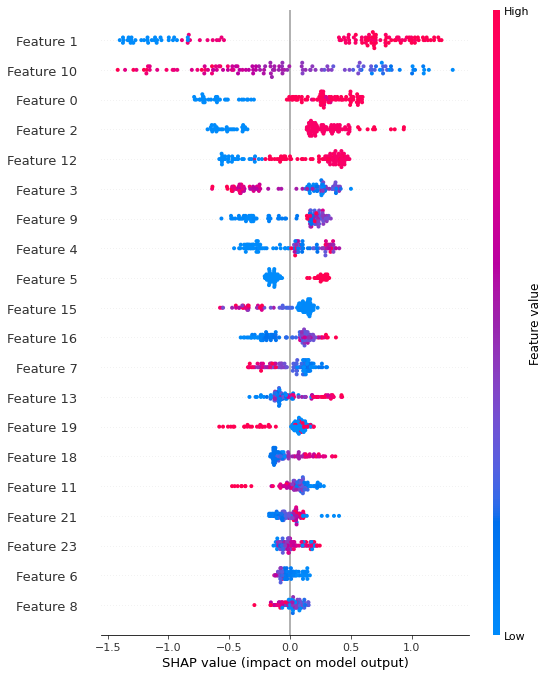

In [ ]:
# using pickled model - CatBoost_model
explainer = shap.TreeExplainer(CatBoost_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(CatBoost_model.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(X)
shap.force_plot(k_explainer.expected_value, k_shap_values, X)

In [ ]:
shap.dependence_plot(3, shap_values, X_test, interaction_index='P1_PT_TYPE')
